<a href="https://colab.research.google.com/github/singhmansi25/Awesome_Python_Scripts/blob/main/EDA_Project_Fire_Incidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Required Libraries**

In [64]:
# library used for data manipulation & analysis 
import pandas as pd   
# library used for working with arrays & linear algebra
import numpy as np
# library used for data visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import plotly.express as px
# library used for statistics & mathematical calculation
import statistics
import scipy.stats as stats
# library used for date time conversion
from datetime import datetime

## **Loading the Dataset**

In [65]:
fire_df = pd.read_csv('/content/drive/MyDrive/Fire-Incidents.csv')

## **Reading the Dataset**

In [66]:
# reading first 5 rows of dataset
fire_df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [67]:
# reading last 5 rows of dataset
fire_df.tail()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
11209,"Trash, Rubbish Storage (inc garbage chute room...",No business interruption,0,0,0,0,2018-02-23T14:41:51,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.373778,"Rubbish, Trash, Waste",Extinguished by automatic system,Improperly Discarded,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with no evidence from street,2018-02-23T14:35:03,2018-02-23T14:38:33
11210,Other Storage Area,No business interruption,0,0,1000,0,2018-02-24T01:42:03,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.280725,Undetermined (formerly 98),Extinguished by occupant,Electrical Failure,General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-02-24T01:30:45,2018-02-24T01:36:59
11211,Other Storage Area,No business interruption,0,0,0,0,2018-02-24T02:40:00,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.280725,Electrical Wiring Insulation,Extinguished by occupant,"Other unintentional cause, not classified",General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-02-24T02:30:33,2018-02-24T02:35:07
11212,Porch or Balcony,Not applicable (not a business),6,0,100000,1,2018-02-24T00:44:00,Confined to part of room/area of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.500863,"Paper, Cardboard",Extinguished by fire department,Improperly Discarded,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Battery operated,Flames showing from small area (one storey or ...,2018-02-24T00:34:12,2018-02-24T00:38:47
11213,"Trash, Rubbish Storage (inc garbage chute room...",No business interruption,0,0,100,0,2018-02-24T08:33:18,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.589233,"Rubbish, Trash, Waste",Extinguished by fire department,Improperly Discarded,Hardware Store,Not applicable: Alarm operated OR presence/ope...,Type undetermined,Fire with no evidence from street,2018-02-24T08:22:30,2018-02-24T08:27:21


In [68]:
# finding shape of dataset
fire_df.shape

(11214, 27)

The Dataset has:

    Number of Rows:      11214
    Number of Columns:   27

In [69]:
# finding information about columns present in dataset
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

The Dataset has:
    
    Number of columns with Float type variable:    3
    Number of columns with Int type variable:      5
    Number of columns with Object type variable:   19

But we see that Columns with Date & Time values are in object format. Let's change it into date-time format.

### **Converting Timestamp to Date Time format**

The timestamps are string values and need to be converted to datetime objects to do feature engineering.

In [70]:
# Converting Columns in object type to Date-time format.
fire_df['Ext_agent_app_or_defer_time'] = pd.to_datetime(fire_df['Ext_agent_app_or_defer_time'])
fire_df['Fire_Under_Control_Time'] = pd.to_datetime(fire_df['Fire_Under_Control_Time'])
fire_df['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(fire_df['Last_TFS_Unit_Clear_Time'])
fire_df['TFS_Alarm_Time'] = pd.to_datetime(fire_df['TFS_Alarm_Time'])
fire_df['TFS_Arrival_Time'] = pd.to_datetime(fire_df['TFS_Arrival_Time'])

In [71]:
# finding information about columns present in dataset
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11214 non-null  object        
 1   Business_Impact                           11214 non-null  object        
 2   Civilian_Casualties                       11214 non-null  int64         
 3   Count_of_Persons_Rescued                  11214 non-null  int64         
 4   Estimated_Dollar_Loss                     11214 non-null  int64         
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64         
 6   Ext_agent_app_or_defer_time               11214 non-null  datetime64[ns]
 7   Extent_Of_Fire                            11214 non-null  object        
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object        
 9   Fire_Alarm_System_Operation 

The Dataset has:
    
    Number of column with Float type variable:      3
    Number of column with Int type variable:        5
    Number of column with Datetime type variable:   5
    Number of column with Object type variable:     14

## **Inspecting Null Columns**

In [72]:
# finding columns with null values
fire_df.isnull().sum()

Area_of_Origin                               0
Business_Impact                              0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Dollar_Loss                        0
Estimated_Number_Of_Persons_Displaced        0
Ext_agent_app_or_defer_time                  0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use 

## **Handling Null Values**

As only Column 'Incident Ward' has null values, let's inspect this column. 

In [73]:
# analysing unique values in the column.
fire_df['Incident_Ward'].unique()

array([18.,  7., 27., 20.,  5., 15., 14., 17., 29.,  9.,  8., 42., 22.,
       36., 43.,  1., 28., 33., 24., 35., 37., 30., 34., 11., 10.,  6.,
       21.,  4., 19., 26., 44., 32., 23., 25., 38., 31.,  2., 13., 12.,
       16.,  3., 40., 41., nan, 39.])

As Incident Ward column signifies Ward code of the area where the incident occurred, we can replace null values with 0.

In [74]:
# replacing null values 0
fire_df['Incident_Ward'].fillna(0, inplace=True)

In [75]:
# again calculating number of null values in each column
fire_df.isnull().sum()

Area_of_Origin                              0
Business_Impact                             0
Civilian_Casualties                         0
Count_of_Persons_Rescued                    0
Estimated_Dollar_Loss                       0
Estimated_Number_Of_Persons_Displaced       0
Ext_agent_app_or_defer_time                 0
Extent_Of_Fire                              0
Fire_Alarm_System_Impact_on_Evacuation      0
Fire_Alarm_System_Operation                 0
Fire_Alarm_System_Presence                  0
Fire_Under_Control_Time                     0
Ignition_Source                             0
Incident_Station_Area                       0
Incident_Ward                               0
Last_TFS_Unit_Clear_Time                    0
Latitude                                    0
Longitude                                   0
Material_First_Ignited                      0
Method_Of_Fire_Control                      0
Possible_Cause                              0
Property_Use                      

## **Analysing Numerical Columns**

In [76]:
# describing the mathematical features of Numerical Columns using count, mean, standard deviation, minimum value, maximum value,
# 25th, 50th, 75th percentile values.
fire_df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.525058,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.793265,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,0.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,9.250000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


In [77]:
# describing the mathematical features of Numerical Columns using mean, median, most common, least common, variance, 
# standard deviation, minimum value, maximum value, skew, kurtosis, mean absolute deviation to understand in better way
# by creating a dictionary of columns and their related numerical features.
explore_dict = {
    'Mean' : [fire_df.Civilian_Casualties.mean(), fire_df.Count_of_Persons_Rescued.mean(), 
                fire_df.Estimated_Dollar_Loss.mean(), fire_df.Estimated_Number_Of_Persons_Displaced.mean(), 
                fire_df.Incident_Station_Area.mean(), fire_df.Incident_Ward.mean()],
    
    'Median' : [statistics.median(fire_df.Civilian_Casualties), statistics.median(fire_df.Count_of_Persons_Rescued),
                statistics.median(fire_df.Estimated_Dollar_Loss), statistics.median(fire_df.Estimated_Number_Of_Persons_Displaced),
                statistics.median(fire_df.Incident_Station_Area), statistics.median(fire_df.Incident_Ward)],
    
    'Min Value' : [fire_df.Civilian_Casualties.min(), fire_df.Count_of_Persons_Rescued.min(), 
                   fire_df.Estimated_Dollar_Loss.min(), fire_df.Estimated_Number_Of_Persons_Displaced.min(), 
                   fire_df.Incident_Station_Area.min(), fire_df.Incident_Ward.min()],
    
    'Max Value' : [fire_df.Civilian_Casualties.max(), fire_df.Count_of_Persons_Rescued.max(), 
                   fire_df.Estimated_Dollar_Loss.max(), fire_df.Estimated_Number_Of_Persons_Displaced.max(), 
                   fire_df.Incident_Station_Area.max(), fire_df.Incident_Ward.max()],
    
    'Most Common' : [fire_df.Civilian_Casualties.value_counts().idxmax(), fire_df.Count_of_Persons_Rescued.value_counts().idxmax(), 
                           fire_df.Estimated_Dollar_Loss.value_counts().idxmax(), fire_df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmax(), 
                           fire_df.Incident_Station_Area.value_counts().idxmax(), fire_df.Incident_Ward.value_counts().idxmax()],
    
    'Least Common' : [fire_df.Civilian_Casualties.value_counts().idxmin(), fire_df.Count_of_Persons_Rescued.value_counts().idxmin(), 
                            fire_df.Estimated_Dollar_Loss.value_counts().idxmin(), fire_df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmin(), 
                            fire_df.Incident_Station_Area.value_counts().idxmin(), fire_df.Incident_Ward.value_counts().idxmin()],
    
    'Variance' : [statistics.variance(fire_df.Civilian_Casualties), statistics.variance(fire_df.Count_of_Persons_Rescued),
                statistics.variance(fire_df.Estimated_Dollar_Loss), statistics.variance(fire_df.Estimated_Number_Of_Persons_Displaced),
                statistics.variance(fire_df.Incident_Station_Area), statistics.variance(fire_df.Incident_Ward)],
    
    'St. Dev' : [statistics.stdev(fire_df.Civilian_Casualties), statistics.stdev(fire_df.Count_of_Persons_Rescued),
                 statistics.stdev(fire_df.Estimated_Dollar_Loss), statistics.stdev(fire_df.Estimated_Number_Of_Persons_Displaced),
                 statistics.stdev(fire_df.Incident_Station_Area), statistics.stdev(fire_df.Incident_Ward)],
    
    'Skew' : [fire_df.Civilian_Casualties.skew(), fire_df.Count_of_Persons_Rescued.skew(), 
              fire_df.Estimated_Dollar_Loss.skew(), fire_df.Estimated_Number_Of_Persons_Displaced.skew(), 
              fire_df.Incident_Station_Area.skew(), fire_df.Incident_Ward.skew()],
    
    'Kurtosis' : [fire_df.Civilian_Casualties.kurt(), fire_df.Count_of_Persons_Rescued.kurt(), 
                  fire_df.Estimated_Dollar_Loss.kurt(), fire_df.Estimated_Number_Of_Persons_Displaced.kurt(), 
                  fire_df.Incident_Station_Area.kurt(), fire_df.Incident_Ward.kurt()],
    
    'Mean Absolute Deviation' : [fire_df.Civilian_Casualties.mad(), fire_df.Count_of_Persons_Rescued.mad(), 
                                 fire_df.Estimated_Dollar_Loss.mad(), fire_df.Estimated_Number_Of_Persons_Displaced.mad(), 
                                 fire_df.Incident_Station_Area.mad(), fire_df.Incident_Ward.mad()],
}


In [78]:
# creating a dataframe from dictionary
explore_df = pd.DataFrame(explore_dict, index = ['Civilian Casualties', 'Count of persons rescued',
                                                 'Estimated Dollar Loss', 'Estimated Number of Persons Displaced',
                                                 'Incident Station Area', 'Incident Ward'])
explore_df.head()

,Mean,Median,Min Value,Max Value,Most Common,Least Common,Variance,St. Dev,Skew,Kurtosis,Mean Absolute Deviation
Civilian Casualties,0.112538,0.0,0.0,15.0,0.0,15.0,2.083276e-01,0.456429,8.455166,149.308247,0.205988
Count of persons rescued,0.062154,0.0,0.0,86.0,0.0,86.0,9.265744e-01,0.962587,67.355363,5747.892245,0.120684
Estimated Dollar Loss,42943.693419,2500.0,0.0,50000000.0,0.0,15600.0,2.850884e+11,533936.667426,76.107737,6892.877165,63425.666540
Estimated Number of Persons Displaced,17.274835,0.0,0.0,999.0,0.0,230.0,1.417807e+04,119.071696,7.929017,61.853362,31.293370
Incident Station Area,288.281880,314.0,111.0,445.0,426.0,346.0,1.155969e+04,107.515995,-0.154630,-1.215131,94.124758


The above statistics show that most values in civilian casualties, persons rescued, dollar loss and persons displaced fall close to 0.

The maximum values are much higher than the mean and median indicating a lot of outliers.

The data is already relatively clean however some cleaning is required:


*   The categorical columns have far too many categories and many of these categories have too few observations.

*   Outliers need to be removed







## **Let's analyse Place of origin where fire incident took place and which property got affected.**

In [79]:
# Analysing Area of Origin column, to understand more fire accident prone areas.
fire_df['Area_of_Origin'].value_counts(normalize=True)*100

Cooking Area or Kitchen                                             25.593009
Porch or Balcony                                                     8.471553
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        7.740325
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     6.696986
Living Area (e.g. living, TV, recreation, etc)                       5.296950
                                                                      ...    
Under Investigation                                                  0.044587
Running Gear (inc wheels and braking systems, transmission syste     0.035670
Incinerator Room                                                     0.026752
Records storage area (inc vaults)                                    0.017835
Fuel Dispensing Area (outside)                                       0.008917
Name: Area_of_Origin, Length: 73, dtype: float64

'Area of Origin' has too many categories. Let's find those which are important for analysis.

In [80]:
# Displaying all the distincts values present in the column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fire_df['Area_of_Origin'].value_counts())

Cooking Area or Kitchen                                                 2870
Porch or Balcony                                                         950
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)            868
Trash, Rubbish Storage (inc garbage chute room, garbage/industri         751
Living Area (e.g. living, TV, recreation, etc)                           594
Garage                                                                   392
Laundry Area                                                             365
Washroom or Bathroom (toilet,restroom/locker room)                       288
Roof                                                                     259
Process Manufacturing (inc manf, prod assembly, repair)                  201
Other - unclassified                                                     201
Chimney/Flue Pipe                                                        197
Engine Area                                                              176

There is a small dropoff in values after 'Attached Deck' where the remaining categories have at least close to 100 observations, This cutoff is arbitrary and a better cutoff might be possible with further analysis. I will group all categories with less observations than 'Attached Deck' as well as the 'Other - unclassified' category in a new 'Other' category.

In [81]:
# keeping a list of Area of Origin.
keep_origin = ['Cooking Area or Kitchen', 
              'Porch or Balcony', 
              'Sleeping Area or Bedroom (inc. patients room, dormitory, etc)',
              'Trash, Rubbish Storage (inc garbage chute room, garbage/industri',
              'Living Area (e.g. living, TV, recreation, etc)',
              'Garage',
              'Laundry Area',
              'Washroom or Bathroom (toilet,restroom/locker room)'
              'Roof',
              'Chimney/Flue Pipe',
              'Engine Area',
              'Trash, rubbish area (outside)',
              'Mechanical/Electrical Services Room',
              'Basement/cellar (not partitioned)',
              'Exterior Wall',
              'Other Outside Area',
              'Hallway, Corridor',
              'Electrical Systems',
              'HVAC Equipment Room (furnace room, water heater closet, boiler)',
              'Court, Patio, Terrace',
              'Attached Deck']

In [82]:
for i in fire_df['Area_of_Origin']:
    if i not in keep_origin:
        fire_df['Area_of_Origin'] = np.where((fire_df.Area_of_Origin == i), 'Other', fire_df.Area_of_Origin)

In [83]:
# The remaining categories
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fire_df['Area_of_Origin'].value_counts())

Cooking Area or Kitchen                                             2870
Other                                                               2681
Porch or Balcony                                                     950
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        868
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     751
Living Area (e.g. living, TV, recreation, etc)                       594
Garage                                                               392
Laundry Area                                                         365
Chimney/Flue Pipe                                                    197
Engine Area                                                          176
Trash, rubbish area (outside)                                        173
Mechanical/Electrical Services Room                                  169
Basement/cellar (not partitioned)                                    159
Exterior Wall                                      

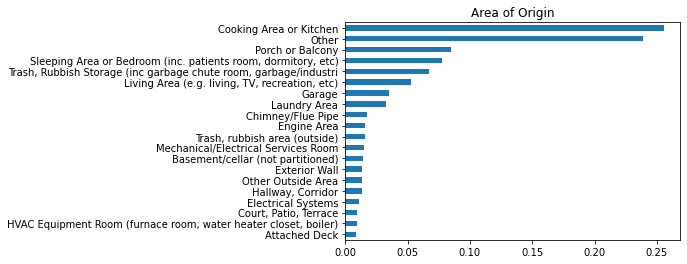

In [84]:
# Let's plot a graph for it.
plt.title('Area of Origin')
fire_df['Area_of_Origin'].value_counts( normalize=True, ascending=True).plot(kind='barh')
plt.show()

The column has unique values with the most common value being '**Cooking area or Kitchen**' representing 25.6% of entries.


In [85]:
# Analysing Property Use column, to understand more fire accident prone areas.
fire_df['Property_Use'].value_counts(normalize=True)*100

Multi-Unit Dwelling - Over 12 Units                               33.163902
Detached Dwelling                                                 20.670590
Semi-Detached Dwelling                                             6.500803
Attached Dwelling (eg. rowhouse, townhouse, etc.)                  5.163189
Multi-Unit Dwelling - 2 to 6 Units                                 2.505796
                                                                    ...    
Hotel, Motel, Lodging - Less than 4 guests or suites (inc B&B)     0.008917
Market - Outdoors (flowers, fruit, vegetable sales)                0.008917
Automobile                                                         0.008917
Sto: Tank, Tank Farm, Other Liquids                                0.008917
Heating Plant - central/district heating plant, steam, etc         0.008917
Name: Property_Use, Length: 217, dtype: float64

The column '**Property Use** has too many categories, let's analyse in detail.

In [86]:
# keeping a list of Property Use.
keep_use = ['Multi-Unit Dwelling - Over 12 Units',
            'Detached Dwelling',
            'Semi-Detached Dwelling',
            'Attached Dwelling (eg. rowhouse, townhouse, etc.)',
            'Multi-Unit Dwelling - 2 to 6 Units',
            'Apartment, Flat, Tenement with Business',
            'Restaurants (occupant load greater than 30 persons, licensed)',
            'Restaurant (occupant load less than 30 persons)',
            'Multi-Unit Dwelling - 7 to 12 Units',
            'Detached Garage',
            'Subway Station',
            'Rooming/Boarding/Lodging House',
            'General Business Office',
            'Motor Vehicle Repair Garage']

In [87]:
for i in fire_df['Property_Use']:
    if i not in keep_use:
        fire_df['Property_Use'] = np.where((fire_df.Property_Use == i), 'Other', fire_df.Property_Use)

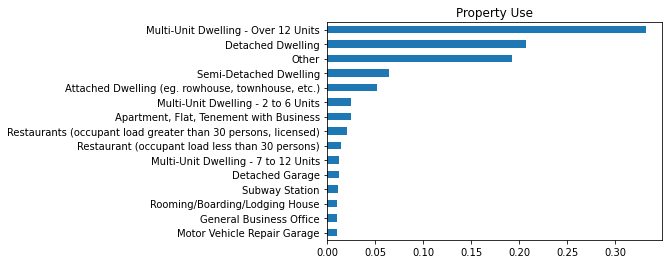

In [88]:
# Let's plot a graph for it.
plt.title('Property Use')
fire_df['Property_Use'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

This describes the use of property that had an incident with most common being '**Multi-unit dwelling**' with 33% while '**Detached dwelling**' consist of 20%.

## **Let's analyse which Business got affected the most due to fire incidents.**

In [89]:
# Analysing Business impact column, to understand if business were impacted due to fire and what were they?
fire_df['Business_Impact'].value_counts(normalize=True)*100

Not applicable (not a business)         45.514535
No business interruption                40.048154
Undetermined                             6.723738
May resume operations within a week      5.724987
May resume operations within a month     1.123596
May not resume operations                0.561798
May resume operations within a year      0.303192
Name: Business_Impact, dtype: float64

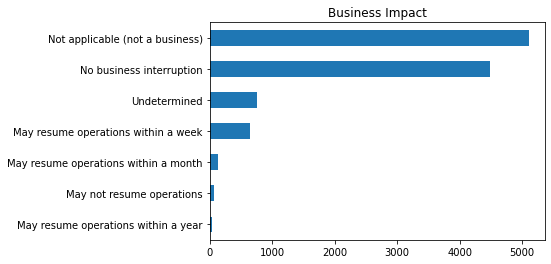

In [90]:
# Now we will plot a graph for top values for it.
plt.title('Business Impact')
fire_df['Business_Impact'].value_counts(ascending=True).plot(kind='barh')
plt.show()

**'Not applicable (no business)'** and **'No business interruption'** represents
86% of entries.

That is business was not impacted in 86% of the fire cases.

### Let's analyse Dollar Loss due to Fire Incidents

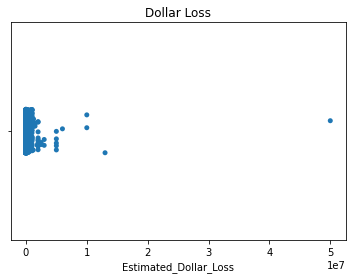

In [91]:
# Let's plot a graph for Dollar loss.
plt.title('Dollar Loss')
sns.stripplot(data=fire_df, x='Estimated_Dollar_Loss')
plt.show()

Since most data has a value of 0 the plots don't show the values very well. To show all the values the following plots exclude all 0 values.

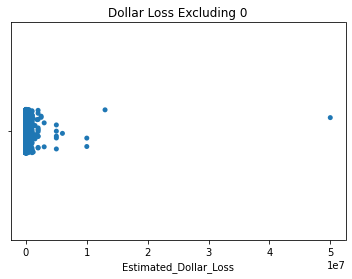

In [92]:
# Let's plot graph for values excluding 0
plt.title('Dollar Loss Excluding 0')
loss_nozero = fire_df[(fire_df.Estimated_Dollar_Loss > 0)]
sns.stripplot(data=loss_nozero, x='Estimated_Dollar_Loss')
plt.show()

These strange values are removed as well as one massive outlier in the dollar loss column

In [93]:
# let's remove that 1 outlier.
fire_df = fire_df[(fire_df.Estimated_Dollar_Loss > 0) & (fire_df.Estimated_Dollar_Loss < 40000000)]

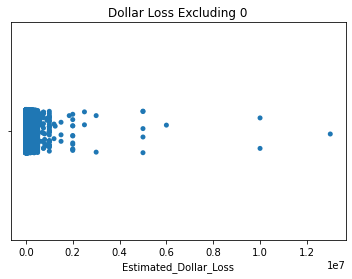

In [94]:
# let's plot the graph again 
plt.title('Dollar Loss Excluding 0')
sns.stripplot(data=fire_df, x='Estimated_Dollar_Loss')
plt.show()

## **Let's analyse Possible causes of Fire, ignition source, material that caused ignition, and extent of fire.**

In [95]:
# Let's analyse the Possible cause of fire.
fire_df['Possible_Cause'].value_counts(normalize=True)*100

Electrical Failure                                                   15.724816
Unattended                                                           15.366503
Undetermined                                                         14.711302
Improperly Discarded                                                 11.138411
Other unintentional cause, not classified                             9.367322
Improper handling of ignition source or ignited material              7.452907
Unintentional, cause undetermined                                     5.610156
Routine maintenance deficiency, eg creosote, lint, grease buildup     4.084767
Design/Construction/Installation/Maintenance Deficiency               4.074529
Used or Placed too close to combustibles                              3.613841
Mechanical Failure                                                    2.416052
Other misuse of ignition source/material ignited                      2.334152
Suspected Arson                                     

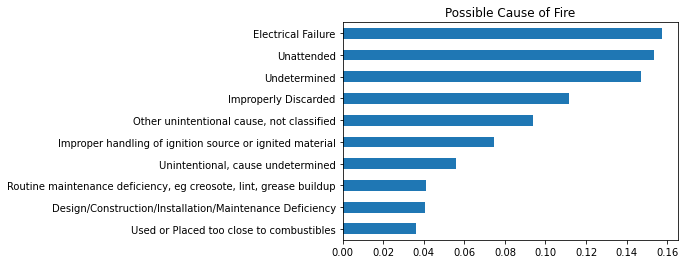

In [96]:
# Plotting a graph for it.
plt.title('Possible Cause of Fire')
fire_df['Possible_Cause'].value_counts(normalize = True, ascending=True)[-10:].plot(kind='barh')
plt.show()

This shows in 30% of the cases, the cause of fire is undetermined, while Electrical failure is next highest cause for fire with 17%.


In [97]:
# Let's analyse the source of fire.
fire_df['Ignition_Source'].value_counts(normalize=True)*100

Undetermined                                                        19.594595
Stove, Range-top burner                                             18.581081
Smoker's Articles (eg. cigarettes, cigars, pipes already ignited    11.670762
Oven                                                                 3.593366
Clothes Dryer                                                        2.979115
                                                                      ...    
Exposure, source structure semi-detached or attached                 0.040950
Exposure, source structure detached                                  0.030713
Chemical Processing Equipment (eg. reactors, distilling units, e     0.030713
Electric Blanket, Heating Pad                                        0.020475
Salamander                                                           0.020475
Name: Ignition_Source, Length: 81, dtype: float64

We see that there are many categories present in Ignition source, so let's analyses them in more detail.

In [98]:
# Displaying all the distincts values present in the column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fire_df['Ignition_Source'].value_counts())

Undetermined                                                        1914
Stove, Range-top burner                                             1815
Smoker's Articles (eg. cigarettes, cigars, pipes already ignited    1140
Oven                                                                 351
Clothes Dryer                                                        291
Circuit Wiring - Copper                                              264
Candle                                                               263
Cord, Cable for Appliance, Electrical Articles                       197
Blow Torch, Bunsen Burner                                            195
Other                                                                152
Other Electrical                                                     152
Cutting/Welding Equipment                                            151
Other Cooking Items (eg Toaster, Kettle, elec frying pan)            143
Vehicle - Electrical                               

In [99]:
# Let's keep only a list of Ignition source.
keep_ignition = ['Undetermined',
                 'Stove, Range-top burner',
                 "Smoker's Articles (eg. cigarettes, cigars, pipes already ignited",
                 'Oven',
                 'Clothes Dryer',
                 'Candle',
                 'Circuit Wiring - Copper',
                 'Blow Torch, Bunsen Burner',
                 'Cord, Cable for Appliance, Electrical Articles',
                 'Cutting/Welding Equipment',
                 'Other Electrical',
                 'Other Electrical Distribution Item',
                 'Other Cooking Items (eg Toaster, Kettle, elec frying pan)',
                 'Vehicle - Electrical',
                 'Open Fired Barbeque - Fixed or Portable',
                 "Other Open Flame Tools/Smokers' Articles",
                 'Distribution Equipment (includes panel boards, fuses, circuit br',
                 'Hot Ashes, Embers, Spark',
                 'Fireplace - Masonry',
                 'Other Appliances',
                 'Service/Utility Lines (includes power/hydro transmission lines)',
                 'Chemical Reaction (eg. spontaneous combustion, etc.)',
                 'Terminations-Copper (incl receptacles, switches, lights)',
                 'Deep Fat Fryer',
                 'Other Mechanical',
                 'Incandescent Lamp - Light Bulb, Spotlight',
                 'Extension Cord, Temporary Wiring',
                 'Wood burning stove']

In [100]:
for i in fire_df['Ignition_Source']:
    if i not in keep_ignition:
        fire_df['Ignition_Source'] = np.where((fire_df.Ignition_Source == i), 'Other', fire_df.Ignition_Source)

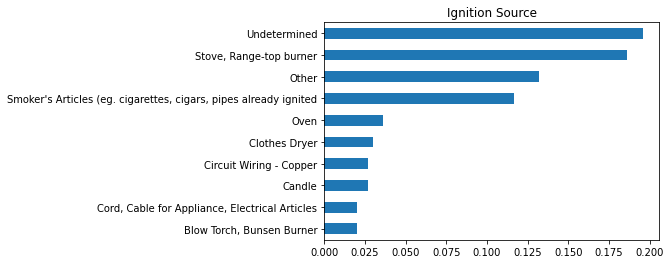

In [101]:
# let's plot a graph for it.
plt.title('Ignition Source')
fire_df['Ignition_Source'].value_counts(normalize=True, ascending=True)[-10:].plot(kind='barh')
plt.show()

This shows Ignition source is Undetermined in 22% cases, while its Stove/ Burner in 17% cases.

In [102]:
# Let's analyse material that caused spread of fire.
fire_df['Material_First_Ignited'].value_counts(normalize=True)*100

Cooking Oil, Grease                                        13.564701
Undetermined (formerly 98)                                 10.493448
Electrical Wiring Insulation                                7.411957
Rubbish, Trash, Waste                                       7.330057
Other                                                       6.797707
Interior Wall/Ceiling                                       3.910729
Plastic                                                     3.767404
Wood                                                        3.746929
Cabinetry                                                   3.450041
Paper, Cardboard                                            3.009828
Upholstered Sofa, Chair, etc.                               2.907453
Mattress, Pillow                                            2.538903
Other Soft Goods, Wearing Apparel                           2.242015
Insulation                                                  2.190827
Multiple Objects or Materials     

This column also has lots of categories, so let's analyse in detail.

In [103]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fire_df['Material_First_Ignited'].value_counts())

Cooking Oil, Grease                                        1325
Undetermined (formerly 98)                                 1025
Electrical Wiring Insulation                                724
Rubbish, Trash, Waste                                       716
Other                                                       664
Interior Wall/Ceiling                                       382
Plastic                                                     368
Wood                                                        366
Cabinetry                                                   337
Paper, Cardboard                                            294
Upholstered Sofa, Chair, etc.                               284
Mattress, Pillow                                            248
Other Soft Goods, Wearing Apparel                           219
Insulation                                                  214
Multiple Objects or Materials                               193
Vehicle                                 

In [104]:
# Keeping a list of material first ignited
keep_material = ['Cooking Oil, Grease',
                 'Rubbish, Trash, Waste',
                 'Undetermined (formerly 98)',
                 'Electrical Wiring Insulation',
                 'Paper, Cardboard',
                 'Wood',
                 'Plastic',
                 'Interior Wall/Ceiling',
                 'Cabinetry',
                 'Upholstered Sofa, Chair, etc.',
                 'Mattress, Pillow',
                 'Insulation',
                 'Other Soft Goods, Wearing Apparel',
                 'Multiple Objects or Materials',
                 'Vehicle',
                 'Linen Other than Bedding',
                 'Books, Magazines, Newspapers',
                 'Creosote (chimney, flue pipe)',
                 'Exterior Roof Covering',
                 'Bedding',
                 'Exterior Cladding',
                 'Other Building Component',
                 'Bush, Grass, Tree, Leaves, etc.',
                 'Fabric - Synthetic, Combination',
                 'Multiple diverse objects ignited',
                 'Structural Member',
                 'Other Furniture',
                 'Floor',
                 'Fabric - Natural (eg. cotton, wool, etc.)']

In [105]:
for i in fire_df['Material_First_Ignited']:
    if i not in keep_material:
        fire_df['Material_First_Ignited'] = np.where((fire_df.Material_First_Ignited == i), 'Other', fire_df.Material_First_Ignited)

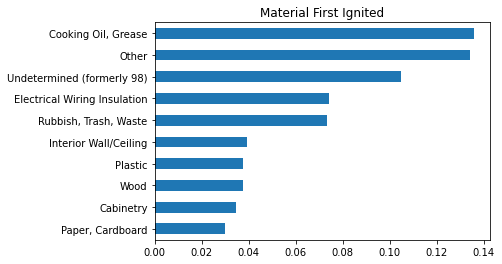

In [106]:
# Let's plot a graph for it.
plt.title('Material First Ignited')
fire_df['Material_First_Ignited'].value_counts(normalize=True, ascending=True)[-10:].plot(kind='barh')
plt.show()

We get to know that Cooking oil, Wastes, electrical wirings are some material that get ignited first.

In [107]:
# Let's analyse extent of fire.
fire_df['Extent_Of_Fire'].value_counts(normalize=True)*100

Confined to object of origin                                                    39.916052
Confined to part of room/area of origin                                         39.885340
Spread to entire room of origin                                                  4.883292
Spread beyond room of origin, same floor                                         4.791155
Confined to roof/exterior structure                                              3.439803
Spread to other floors, confined to building                                     2.764128
Spread beyond building of origin, resulted in exposure fire(s)                   1.228501
Entire Structure                                                                 0.982801
Undetermined                                                                     0.788288
Spread beyond building of origin                                                 0.563063
Multi unit bldg: spread beyond suite of origin but not to separated suite(s)     0.419738
Multi unit

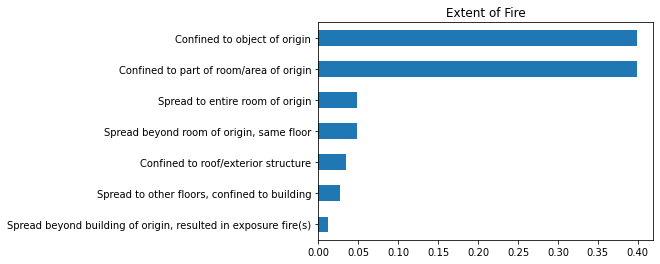

In [108]:
# Now we will plot a graph for top values for it.
plt.title('Extent of Fire')
fire_df['Extent_Of_Fire'].value_counts(normalize=True, ascending=True)[-7:].plot(kind='barh')
plt.show()

We see that '**confined to object/room of origin**' make up 82% of values.

This means the extent of fire is confined to the area of origin most of the times. 

## **Let's Analyses the Fire Alarm System Condition before incident**

In [109]:
# Let's analyse if Fire alarm system was present or not in accident area.
fire_df['Fire_Alarm_System_Presence'].value_counts(normalize=True)*100

Fire alarm system present                                                 53.347666
Not applicable (bldg not classified by OBC OR detached/semi/town home)    18.140868
No Fire alarm system                                                      17.147830
Undetermined                                                              11.363636
Name: Fire_Alarm_System_Presence, dtype: float64

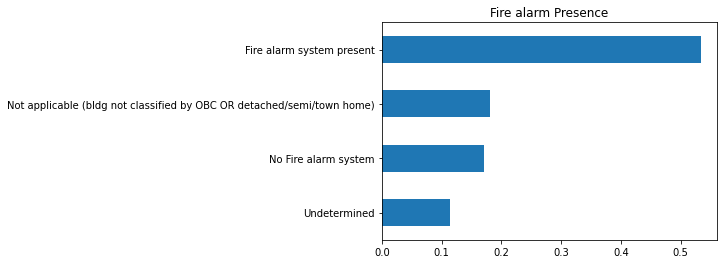

In [110]:
# Let's plot a graph for the same.
plt.title('Fire alarm Presence')
fire_df['Fire_Alarm_System_Presence'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

This shows 55% of the Fire alarm was present, however 43% of the times, it wasn't present.

In [111]:
# Let's analyse how many times the Fire alarm system worked during the accidents.
fire_df['Fire_Alarm_System_Operation'].value_counts(normalize=True)*100

Fire alarm system operated                  38.994676
Not applicable (no system)                  36.476249
Fire alarm system operation undetermined    12.714988
Fire alarm system did not operate           11.814087
Name: Fire_Alarm_System_Operation, dtype: float64

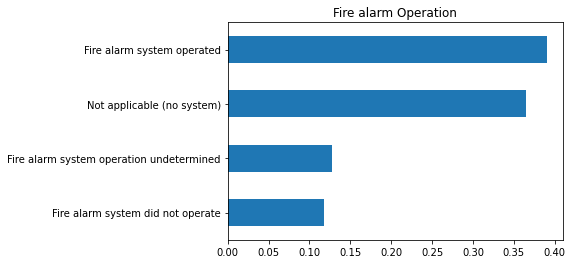

In [112]:
# Let's plot a graph for the same.
plt.title('Fire alarm Operation')
fire_df['Fire_Alarm_System_Operation'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

This shows Fire alarm system was present and operated for 40% of the cases. 

While it didn't operate for 12% of the time. 

Fire alarm wasn't present in 35% of the cases.

In [113]:
# Let's analyse what impact did fire alarm had before fire broke into.
fire_df['Fire_Alarm_System_Impact_on_Evacuation'].value_counts(normalize=True)*100

Not applicable: No fire alarm system, no persons present                              28.603604
Not applicable: Occupant(s) first alerted by other means                              23.075348
All persons (at risk of injury) evacuated as a result of hearing fire alarm system    18.345618
Undetermined                                                                          13.667076
Some persons (at risk) evacuated as a result of hearing fire alarm system             10.810811
No one (at risk) evacuated as a result of hearing fire alarm system                    5.128993
Fire Alarm system operated but failed to alert occupant(s)                             0.368550
Name: Fire_Alarm_System_Impact_on_Evacuation, dtype: float64

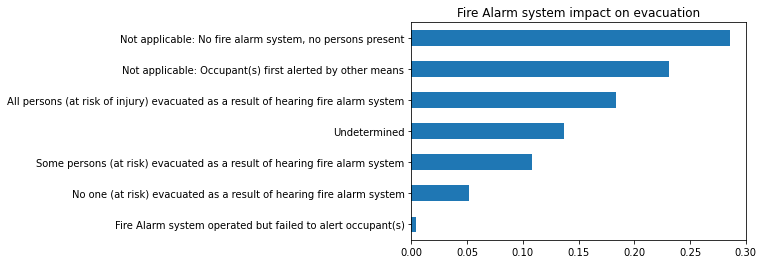

In [114]:
# Let's plot a graph for the same.
plt.title('Fire Alarm system impact on evacuation')
fire_df['Fire_Alarm_System_Impact_on_Evacuation'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

This shows in 50% of the fire incidents, fire alarm wasn't present. 

In [115]:
# Let's analyse what type of Smoke alarm was present.
fire_df['Smoke_Alarm_at_Fire_Origin_Alarm_Type'].value_counts(normalize=True)*100

Battery operated                                            23.024161
Not applicable - no smoke alarm or presence undetermined    22.850123
Hardwired (standalone)                                      20.167895
Type undetermined                                           16.912367
Interconnected                                              16.809992
Wireless                                                     0.235463
Name: Smoke_Alarm_at_Fire_Origin_Alarm_Type, dtype: float64

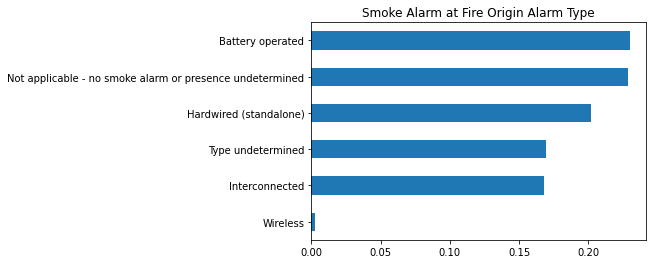

In [116]:
# Let's plot a graph for the same.
plt.title('Smoke Alarm at Fire Origin Alarm Type')
fire_df['Smoke_Alarm_at_Fire_Origin_Alarm_Type'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

By this we get to know, that 23% of times the Smoke Alarm was Battery operated while 22.85% times it wasn't not present.

In [117]:
# Let's analyse if Smoke alarm worked or failed .
fire_df['Smoke_Alarm_at_Fire_Origin_Alarm_Failure'].value_counts(normalize=True)*100

Not applicable: Alarm operated OR presence/operation undetermined    69.195332
Remote from fire – smoke did not reach alarm                          9.142097
Reason for inoperation undetermined                                   5.702293
Other reason                                                          5.569206
Separated from fire (e.g. wall, etc)                                  3.398853
No battery                                                            1.812039
Unit failure                                                          1.699427
Dead battery                                                          1.515152
Electrical line or battery not connected                              1.177314
Improper installation of unit                                         0.440213
Tampered with (vandalism)                                             0.348075
Name: Smoke_Alarm_at_Fire_Origin_Alarm_Failure, dtype: float64

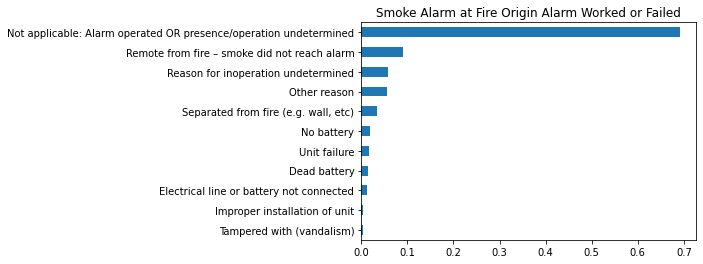

In [118]:
# Let's plot a graph for the same.
plt.title('Smoke Alarm at Fire Origin Alarm Worked or Failed')
fire_df['Smoke_Alarm_at_Fire_Origin_Alarm_Failure'].value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.show()

This shows 69% of the time alarm operation was undetermined.

## **Let's analyse Loss of Life or Injuries caused due to Fire incidents.**

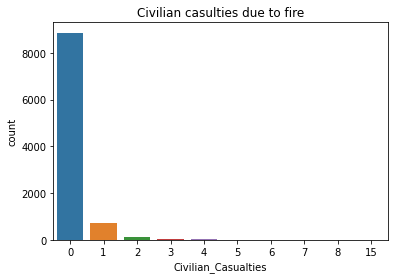

In [119]:
# Let's plot the graph for number of injuries occured due to fire.
plt.title('Civilian casulties due to fire')
sns.countplot(data=fire_df, x='Civilian_Casualties')
plt.show()

Since most data has a value of 0 the plots don't show the values very well. To show all the values the following plots exclude all 0 values.

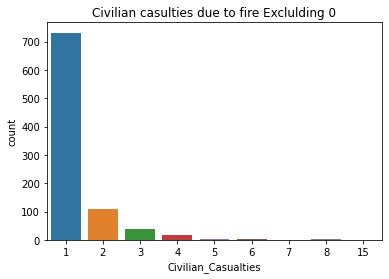

In [120]:
# Let's plot the graph for number of injuries occured due to fire excluding 0.
plt.title('Civilian casulties due to fire Exclulding 0')
casualties_nozero = fire_df[(fire_df.Civilian_Casualties > 0)]
sns.countplot(data=casualties_nozero, x='Civilian_Casualties')
plt.show()

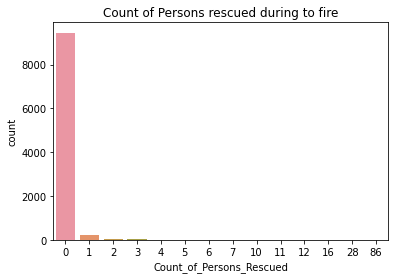

In [121]:
# Let's plot the graph for number of persons rescued during fire.
plt.title('Count of Persons rescued during to fire')
sns.countplot(data=fire_df, x='Count_of_Persons_Rescued')
plt.show()

Since most data has a value of 0 the plots don't show the values very well. To show all the values the following plots exclude all 0 values.

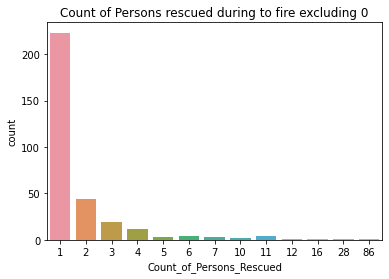

In [122]:
# Let's plot the graph for number of persons rescued during fire excluding 0.
plt.title('Count of Persons rescued during to fire excluding 0')
rescued_nozero = fire_df[(fire_df.Count_of_Persons_Rescued > 0)]
sns.countplot(data=rescued_nozero, x='Count_of_Persons_Rescued')
plt.show()

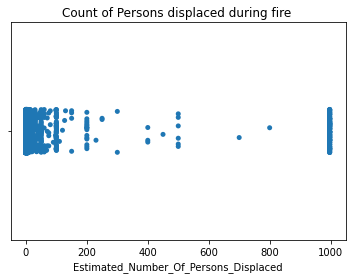

In [123]:
# Let's plot the graph for number of persons displaced during fire.
plt.title('Count of Persons displaced during fire ')
sns.stripplot(data=fire_df, x='Estimated_Number_Of_Persons_Displaced')
plt.show()

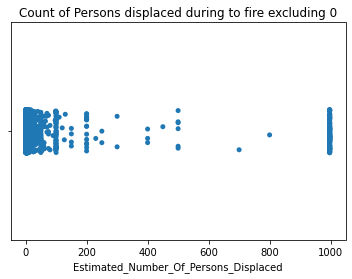

In [124]:
# Let's plot the graph for number of persons displaced during fire excluding 0.
plt.title('Count of Persons displaced during to fire excluding 0')
displaced_nozero = fire_df[(fire_df.Estimated_Number_Of_Persons_Displaced > 0)]
sns.stripplot(data=displaced_nozero, x='Estimated_Number_Of_Persons_Displaced')
plt.show()

In the persons displaced plot there seems to be a lot of values around 1000 while a majority of other values fall under 200, this is strange.

In [125]:
len(fire_df[(fire_df.Estimated_Number_Of_Persons_Displaced > 900)])

153

All of these values are exactly 997. there seems to be no relation between civilian casualties, persons rescued, dollar loss and persons displaced when persons displaced is 997, this value appears to be a placeholder or unknown category.

In [126]:
fire_df = fire_df[(fire_df.Estimated_Number_Of_Persons_Displaced > 0) & (fire_df.Estimated_Number_Of_Persons_Displaced < 900)]

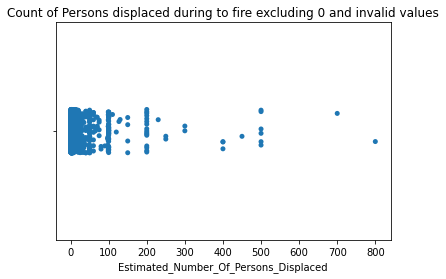

In [127]:
# Let's plot the graph for number of persons displaced during fire excluding 0.
plt.title('Count of Persons displaced during to fire excluding 0 and invalid values')
sns.stripplot(data=fire_df, x='Estimated_Number_Of_Persons_Displaced')
plt.show()

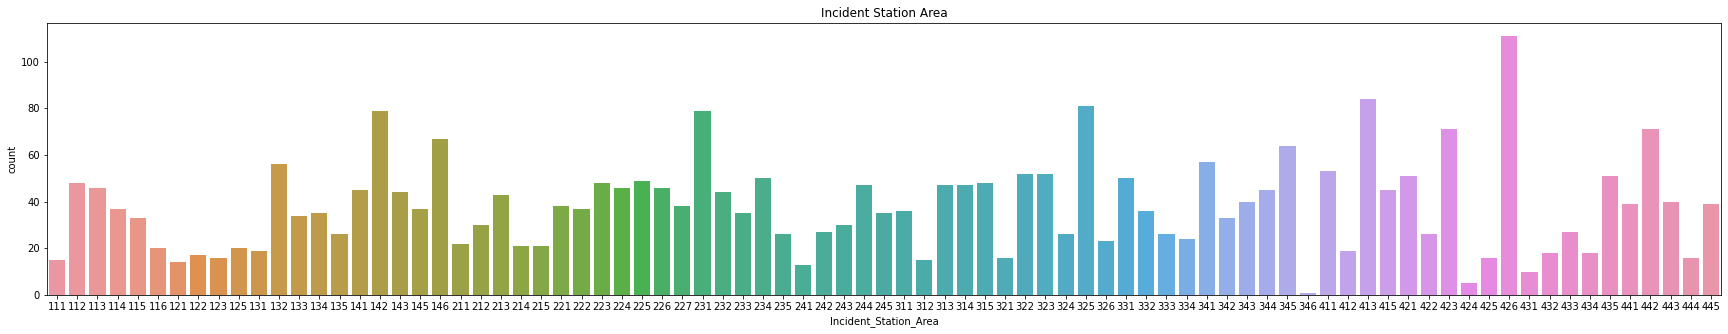

In [128]:
# Let's see the Incident station area.
fig, axes = plt.subplots(1,1, figsize=(30,5))
axes.set_title('Incident Station Area')
sns.countplot(data=fire_df, x='Incident_Station_Area', ax=axes)
plt.show()

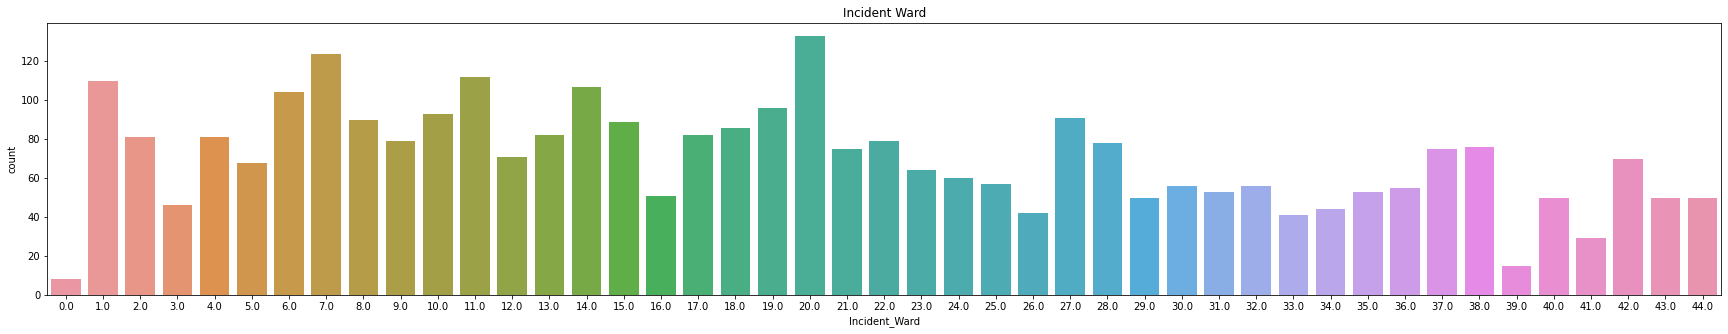

In [129]:
# Let's see the Incident Ward.
fig, axes = plt.subplots(1,1, figsize=(30,5))
axes.set_title('Incident Ward')
sns.countplot(data=fire_df, x='Incident_Ward', ax=axes)
plt.show()

## **Feature Engineering**

Let's use the timestamp columns to engineer some additional features.


In [130]:
# Year month and day of the week (0-6)
fire_df['Year'] = pd.DatetimeIndex(fire_df['Ext_agent_app_or_defer_time']).year
fire_df['Month'] = pd.DatetimeIndex(fire_df['Ext_agent_app_or_defer_time']).month
fire_df['Day_of_Week'] = pd.DatetimeIndex(fire_df['Ext_agent_app_or_defer_time']).dayofweek

In [131]:
# Time of day(morning, afternoon, etc..)
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
fire_df['Part_of_Day'] = pd.cut(pd.DatetimeIndex(fire_df['Ext_agent_app_or_defer_time']).hour, bins=b, labels=l, include_lowest=True)

In [132]:
# Reaction time, time it took to extuinguish and the total time spent at the incident
fire_df['Reaction_time_minutes'] = round((fire_df.TFS_Arrival_Time - fire_df.TFS_Alarm_Time).dt.total_seconds()/60, 2)
fire_df['Extinguish_time_minutes'] = round((fire_df.Fire_Under_Control_Time - fire_df.TFS_Arrival_Time).dt.total_seconds()/60, 2)
fire_df['Time_spent_minutes'] = round((fire_df.Last_TFS_Unit_Clear_Time - fire_df.TFS_Arrival_Time).dt.total_seconds()/60, 2)

fire_df[['Ext_agent_app_or_defer_time', 'Year', 'Month', 'Day_of_Week', 'Part_of_Day', 
    'Reaction_time_minutes', 'Extinguish_time_minutes', 'Time_spent_minutes']].head()

,Ext_agent_app_or_defer_time,Year,Month,Day_of_Week,Part_of_Day,Reaction_time_minutes,Extinguish_time_minutes,Time_spent_minutes
1,2018-11-24 07:19:00,2018,11,5,Early Morning,5.18,4.62,330.97
2,2017-02-09 18:02:13,2017,2,3,Evening,3.70,47.53,347.73
3,2012-10-30 00:52:04,2012,10,1,Late Night,2.95,43.83,3825.55
4,2018-07-08 04:35:00,2018,7,6,Late Night,5.07,24.57,750.22
6,2015-03-07 04:49:35,2015,3,5,Late Night,6.25,14.53,158.77


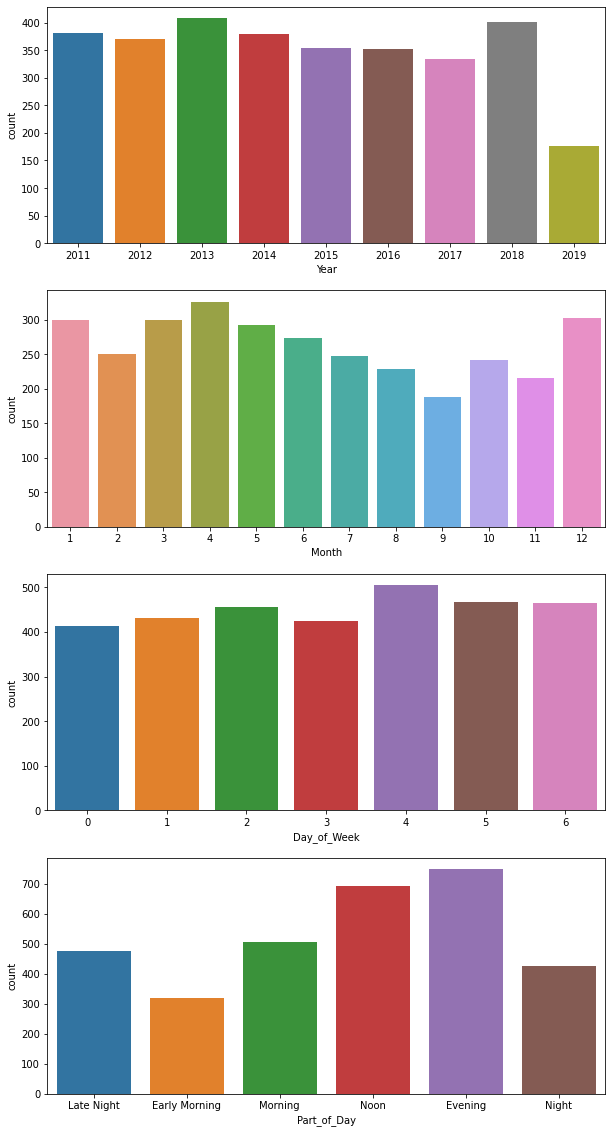

In [133]:
# Let's plot a graph for Year, month, day of week and part of day.
fig, axes = plt.subplots(4, 1, figsize=(10,20))

sns.countplot(data=fire_df, x='Year', ax=axes[0])
sns.countplot(data=fire_df, x='Month', ax=axes[1])
sns.countplot(data=fire_df, x='Day_of_Week', ax=axes[2])
sns.countplot(data=fire_df, x='Part_of_Day', ax=axes[3])

This shows that most incidents occur in May, April, and on Friday in the Noon or Evening.

In [134]:
# Let's describe the Reaction time, Extinguish time, Time spent in minutes.
new_dict = {
    'Min' : [fire_df.Reaction_time_minutes.min(), fire_df.Extinguish_time_minutes.min(), fire_df.Time_spent_minutes.min()],
    '25%' : [fire_df.Reaction_time_minutes.quantile(q=0.25), fire_df.Extinguish_time_minutes.quantile(q=0.25), fire_df.Time_spent_minutes.quantile(q=0.25)],
    'Median' : [statistics.median(fire_df.Reaction_time_minutes), statistics.median(fire_df.Extinguish_time_minutes),  statistics.median(fire_df.Time_spent_minutes)],
    '75%' : [fire_df.Reaction_time_minutes.quantile(q=0.75), fire_df.Extinguish_time_minutes.quantile(q=0.75), fire_df.Time_spent_minutes.quantile(q=0.75)],
    'Max' : [fire_df.Reaction_time_minutes.max(), fire_df.Extinguish_time_minutes.max(), fire_df.Time_spent_minutes.max()]}

new_df = pd.DataFrame(new_dict, index = ['Reaction Time in Minutes', 'Extinguish Time in Minutes', 'Total Time Spent in Minutes'])
new_df.head()

,Min,25%,Median,75%,Max
Reaction Time in Minutes,0.4,4.13,4.93,5.8500,17.92
Extinguish Time in Minutes,0.0,5.02,9.92,18.8450,1233.62
Total Time Spent in Minutes,0.4,56.74,88.47,156.6275,4360.38


In these features it also stands out that the maximum values are far above the median and quartile values.

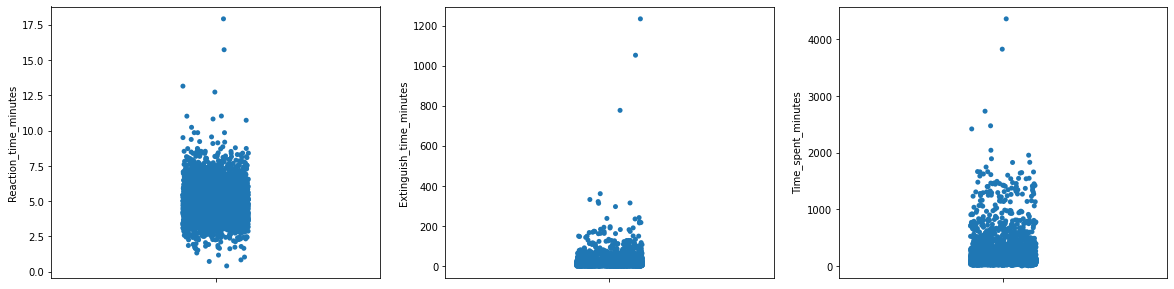

In [135]:
# Let's plot a graph for it.
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.stripplot(data=fire_df, y='Reaction_time_minutes', ax=axes[0])
sns.stripplot(data=fire_df, y='Extinguish_time_minutes', ax=axes[1])
sns.stripplot(data=fire_df, y='Time_spent_minutes', ax=axes[2])

There some outliers in all of them.

In [136]:
fire_df = fire_df[(fire_df.Extinguish_time_minutes < 750) & (fire_df.Reaction_time_minutes < 250)]

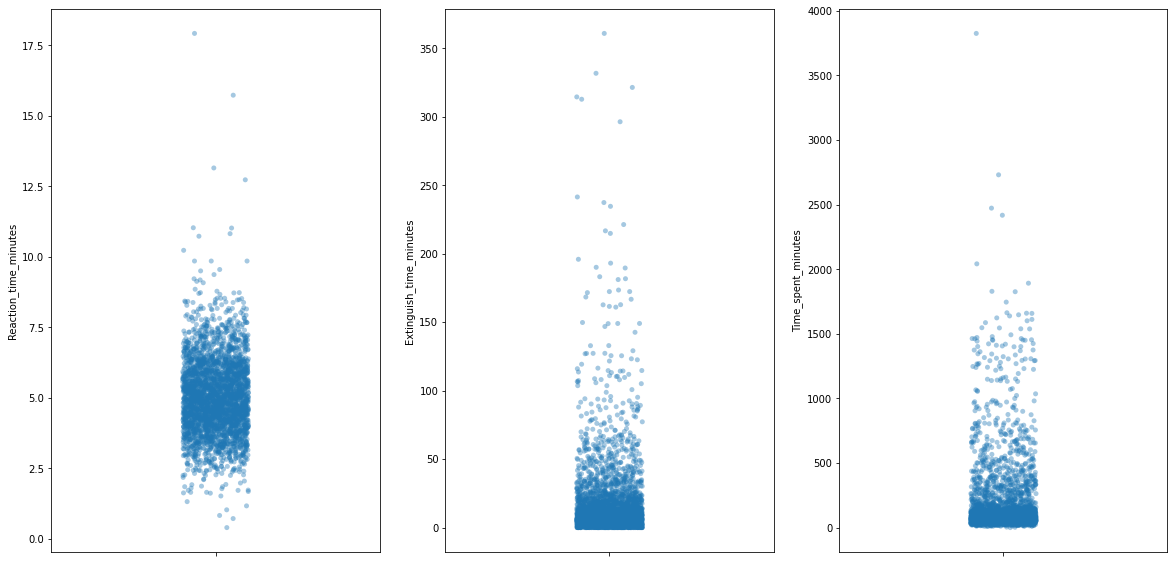

In [137]:
fig, axes = plt.subplots(1,3, figsize=(20,10))

sns.stripplot(data=fire_df, y='Reaction_time_minutes', alpha=0.4, ax=axes[0])
sns.stripplot(data=fire_df, y='Extinguish_time_minutes', alpha=0.4, ax=axes[1])
sns.stripplot(data=fire_df, y='Time_spent_minutes', alpha=0.4, ax=axes[2])


# **Exploratory Data Analysis**

For the data analysis, we change the civilian casualties feature to a target column consisting of Casualties or No Casualties, the data analysis will focus on what factors determine whether there will be casualties in order to help inform firefighters and the public.

In [138]:
fire_df_hue = fire_df.copy()
fire_df_hue.loc[fire_df_hue['Civilian_Casualties'] > 0, 'Civilian_Casualties'] = 'Casualties'
fire_df_hue.loc[fire_df_hue['Civilian_Casualties'] == 0, 'Civilian_Casualties'] = 'No Casualties'
fire_df_hue.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Year,Month,Day_of_Week,Part_of_Day,Reaction_time_minutes,Extinguish_time_minutes,Time_spent_minutes
1,Cooking Area or Kitchen,Undetermined,No Casualties,28,50000,28,2018-11-24 07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,2018,11,5,Early Morning,5.18,4.62,330.97
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),Casualties,16,1000000,130,2017-02-09 18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,2017,2,3,Evening,3.70,47.53,347.73
3,Other,May not resume operations,No Casualties,12,1000000,14,2012-10-30 00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,2012,10,1,Late Night,2.95,43.83,3825.55
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),Casualties,11,125000,2,2018-07-08 04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,2018,7,6,Late Night,5.07,24.57,750.22
6,Other,May resume operations within a month,No Casualties,11,30000,13,2015-03-07 04:49:35,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,Fire with no evidence from street,2015-03-07 04:38:13,2015-03-07 04:44:28,2015,3,5,Late Night,6.25,14.53,158.77


In [139]:
fire_df_no_casualties = fire_df_hue[(fire_df_hue.Civilian_Casualties == "No Casualties")]
fire_df_casualties = fire_df_hue[(fire_df_hue.Civilian_Casualties == "Casualties")]

I want to recreate the countplots that I made above however to do this I first need to balance the dataset.

In [140]:
df_sample = fire_df_no_casualties.sample(frac=0.09)
balance = pd.concat([df_sample, fire_df_casualties])
df_sample[:2]

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Year,Month,Day_of_Week,Part_of_Day,Reaction_time_minutes,Extinguish_time_minutes,Time_spent_minutes
3916,Cooking Area or Kitchen,Not applicable (not a business),No Casualties,0,500,1,2013-10-19 19:19:57,Confined to object of origin,No one (at risk) evacuated as a result of hear...,Fire alarm system operated,...,Fire extinguished prior to arrival,2013-10-19 19:14:08,2013-10-19 19:18:05,2013,10,5,Evening,3.95,1.87,36.22
10236,Cooking Area or Kitchen,Not applicable (not a business),No Casualties,0,9999,3,2017-10-17 20:09:13,Confined to object of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),...,Fire extinguished prior to arrival,2017-10-17 20:00:34,2017-10-17 20:06:03,2017,10,1,Evening,5.48,3.17,33.98


By re-running this cell above the random sample will change, you could use this to test the statistical significance of the findings.

In [141]:
print(f'Length of No Casualties:           {len(fire_df_no_casualties)}')
print(f'Length of Casualties:              {len(fire_df_casualties)}')
print(f'Length of Sample of No Casualties: {len(df_sample)}')
print(f'Length of Balanced DataFrame:      {len(balance)}')

Length of No Casualties:           2635
Length of Casualties:              524
Length of Sample of No Casualties: 237
Length of Balanced DataFrame:      761


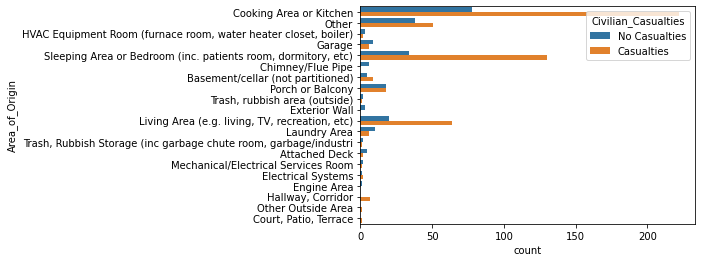

In [142]:
sns.countplot(data=balance, y='Area_of_Origin', hue='Civilian_Casualties')
plt.show()

The most dangerous area's are the cooking area and sleeping area's.

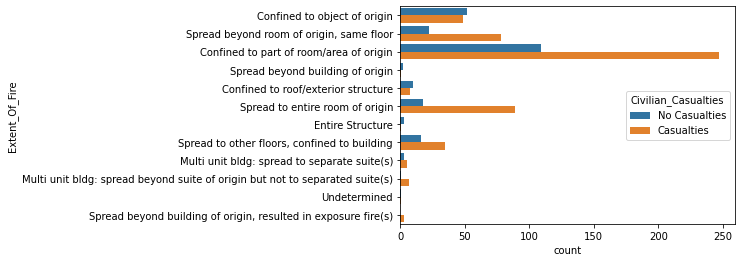

In [143]:
sns.countplot(data=balance, y='Extent_Of_Fire', hue='Civilian_Casualties')
plt.show()

Unsuprisingly incidents that are confined to a smaller area are not as lethal as fires that spread.

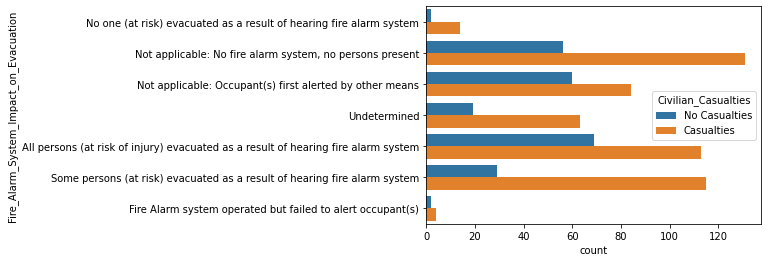

In [144]:
sns.countplot(data=balance, y='Fire_Alarm_System_Impact_on_Evacuation', hue='Civilian_Casualties')
plt.show()

Counterintuitively this plot shows that evacuating people causes more casualties.

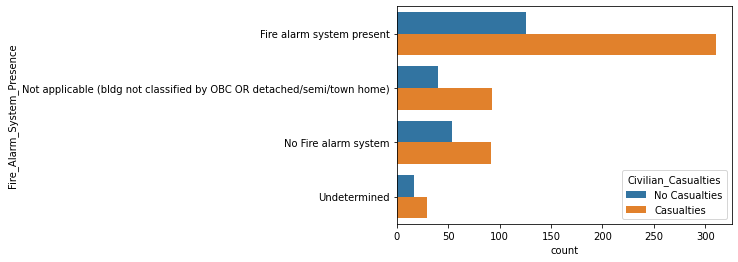

In [145]:
sns.countplot(data=balance, y='Fire_Alarm_System_Presence', hue='Civilian_Casualties')
plt.show()

The presence of the fire alarm does not seem to hold statistical significance.

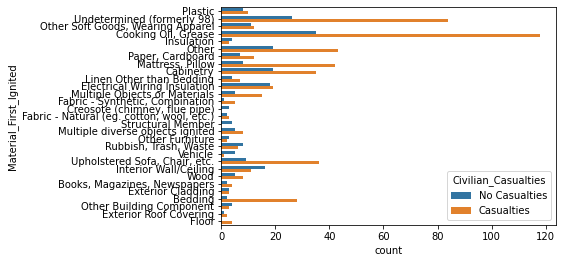

In [146]:
sns.countplot(data=balance, y='Material_First_Ignited', hue='Civilian_Casualties')
plt.show()

The most dangerous materials are cooking oil, cabinetry, bedding and mattresses/pillows.

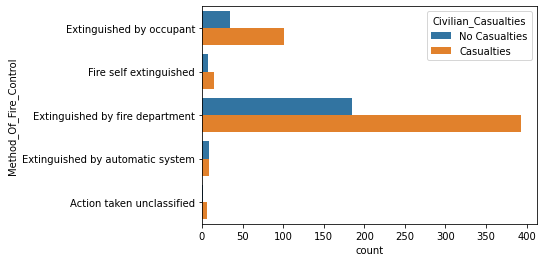

In [147]:
sns.countplot(data=balance, y='Method_Of_Fire_Control', hue='Civilian_Casualties')
plt.show()

There are more casualties when occupents try to put out the fire themselves. Also automatic systems reduce casualties a lot.

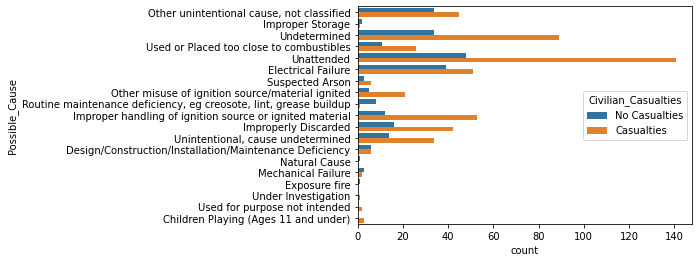

In [148]:
sns.countplot(data=balance, y='Possible_Cause', hue='Civilian_Casualties')
plt.show()

The most common probable causes that result in casualties are not paying attention(unattended) and improper handling of the ignition source.

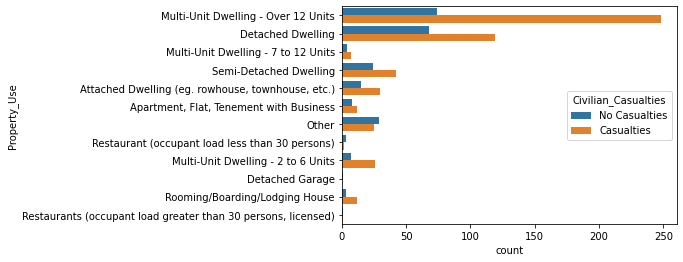

In [149]:
sns.countplot(data=balance, y='Property_Use', hue='Civilian_Casualties')
plt.show()

Multi-unit dwellings are more dangerous properties.

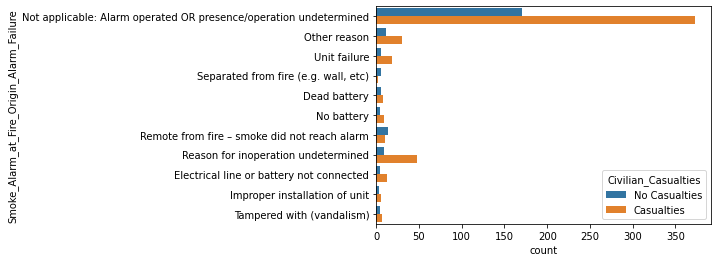

In [150]:
sns.countplot(data=balance, y='Smoke_Alarm_at_Fire_Origin_Alarm_Failure', hue='Civilian_Casualties')
plt.show()

Improper use of a fire alarm is dangerous.

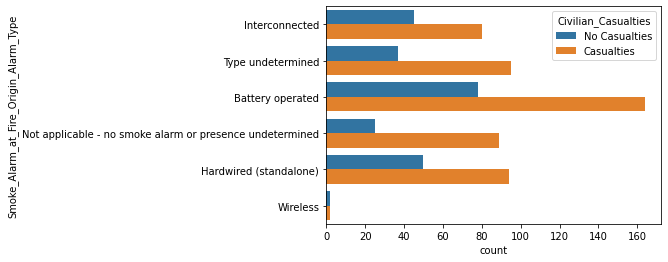

In [151]:
sns.countplot(data=balance, y='Smoke_Alarm_at_Fire_Origin_Alarm_Type', hue='Civilian_Casualties')
plt.show()

Battery operated fire alarms are more common when there are casualties.

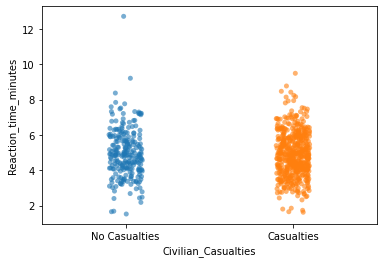

In [152]:
sns.stripplot(data=balance, y='Reaction_time_minutes', x='Civilian_Casualties', alpha=0.6)
plt.show()

Reaction time does not determine casualties.

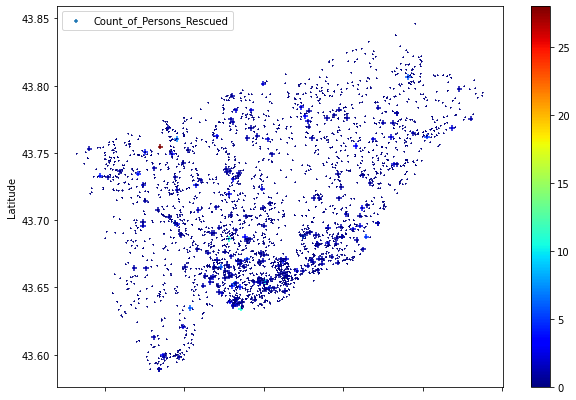

In [153]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
disp= fire_df['Count_of_Persons_Rescued'].to_numpy()

size = np.clip(10 * disp / np.mean(disp),1.0,np.max(disp))
fire_df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=size, label="Count_of_Persons_Rescued",
    c=fire_df['Count_of_Persons_Rescued'], cmap=plt.get_cmap("jet"),
  colorbar=True, figsize=(10,7), marker='+')
plt.legend()
plt.show()

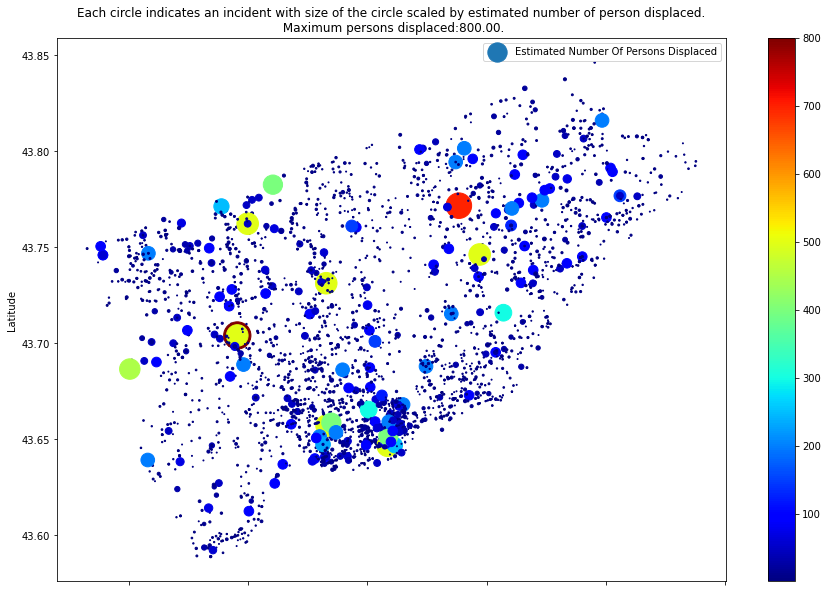

In [154]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
disp= fire_df['Estimated_Number_Of_Persons_Displaced'].to_numpy()

size = np.clip(10 * disp / np.mean(disp),1.0,np.max(disp))
fire_df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=size, label="Estimated Number Of Persons Displaced",
    c=fire_df['Estimated_Number_Of_Persons_Displaced'], cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(15,10), marker='o')
plt.title('Each circle indicates an incident with size of the circle scaled by estimated number of person displaced.\n Maximum persons displaced:%.2f.'%disp.max())
plt.legend()
plt.show()

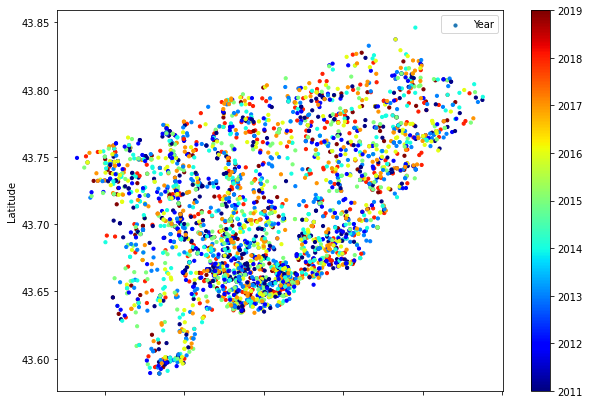

In [155]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
year= fire_df['Year'].to_numpy()

size = np.clip(10 * year / np.mean(year),1.0,np.max(year))
fire_df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=size, label="Year",
    c=fire_df['Year'], cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(10,7))
plt.legend()
plt.show()

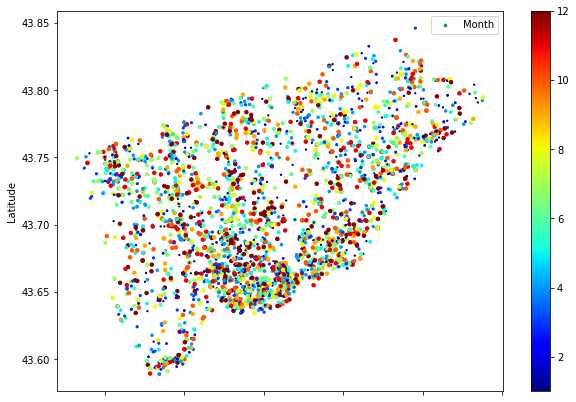

In [156]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
mon= fire_df['Month'].to_numpy()

size = np.clip(10 * mon / np.mean(mon),1.0,np.max(mon))
fire_df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=size, label="Month",
    c=fire_df['Month'], cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(10,7))
plt.legend()
plt.show()

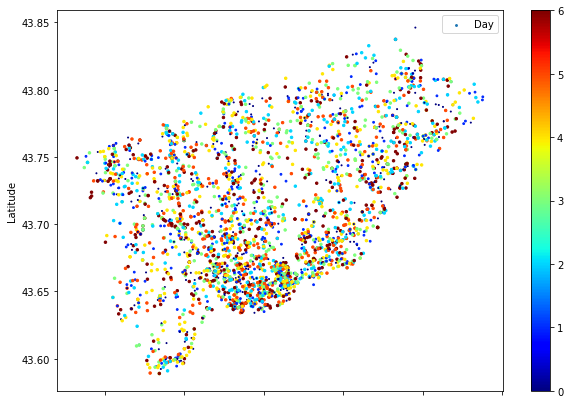

In [157]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
day= fire_df['Day_of_Week'].to_numpy()

size = np.clip(10 * day / np.mean(day),1.0,np.max(day))

fire_df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=size, label="Day",
    c=fire_df['Day_of_Week'], cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(10,7))
plt.legend()
plt.show()

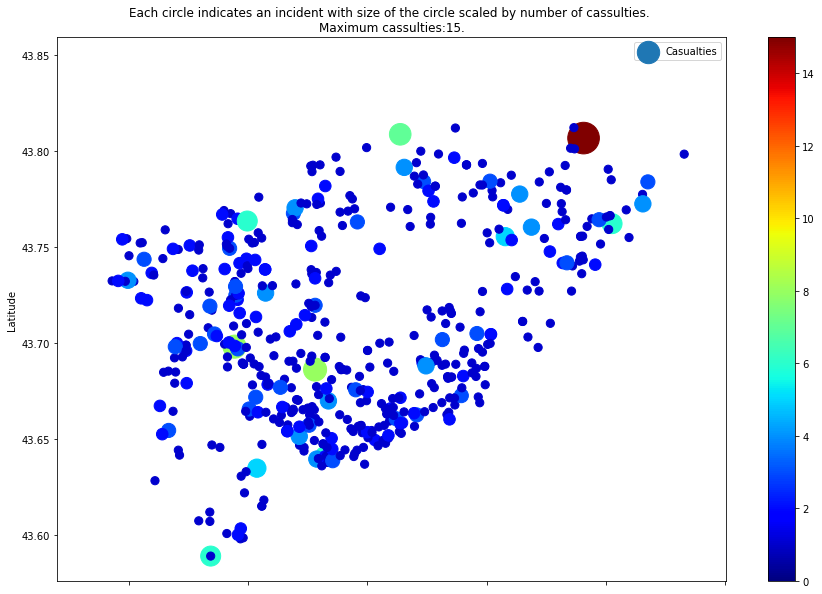

In [158]:
cassulties= fire_df['Civilian_Casualties'].to_numpy().astype(float)
size = 1000 * cassulties/np.max(cassulties)

fire_df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=size, label="Casualties",
    c=fire_df['Civilian_Casualties'], cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(15,10))
plt.title('Each circle indicates an incident with size of the circle scaled by number of cassulties. \nMaximum cassulties:%d.'%fire_df['Civilian_Casualties'].max())
plt.legend()
plt.show()

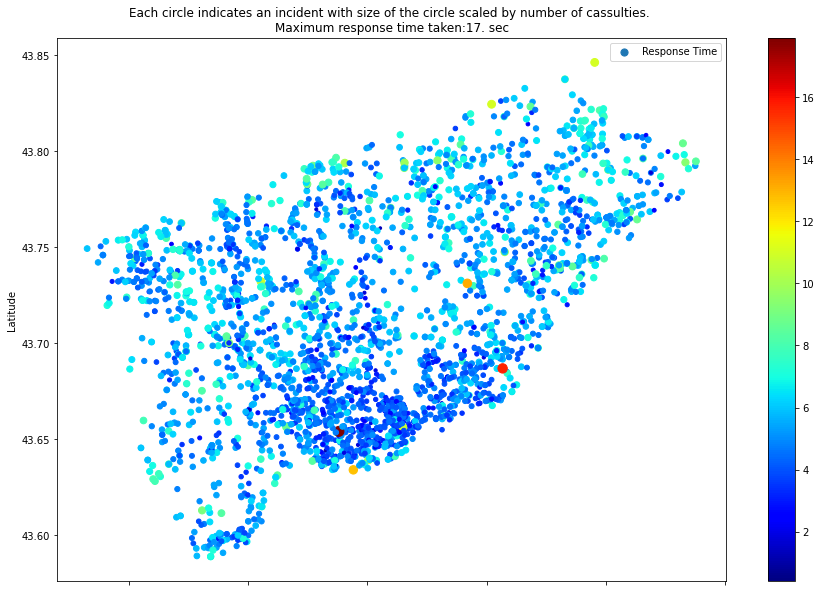

In [159]:
response= fire_df['Reaction_time_minutes'].to_numpy().astype(float)
size = 100*response/np.max(response)

fire_df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=size, label="Response Time",
    c=fire_df['Reaction_time_minutes'], cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(15,10))
plt.title('Each circle indicates an incident with size of the circle scaled by number of cassulties. \nMaximum response time taken:%d. sec'%fire_df['Reaction_time_minutes'].max())
plt.legend()
plt.show()

In [160]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

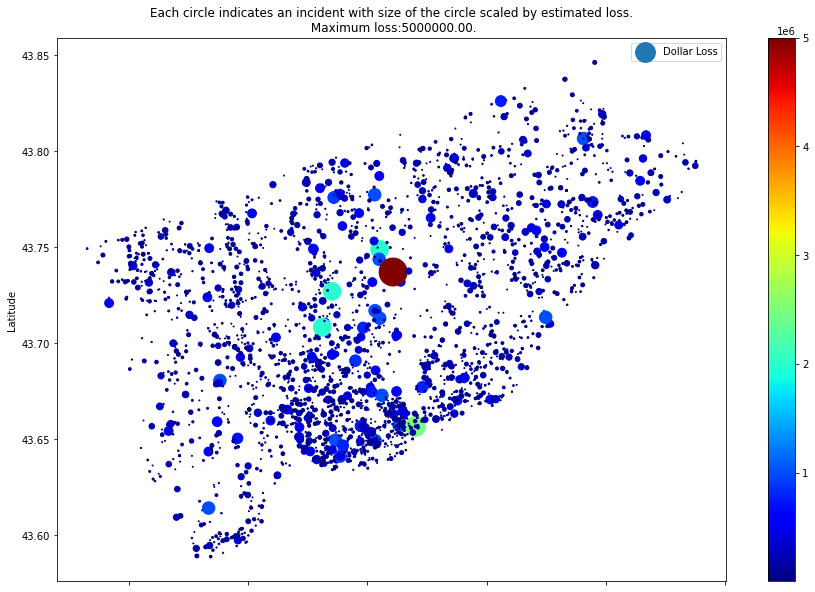

In [161]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
dollor_loss= fire_df['Estimated_Dollar_Loss'].to_numpy()

size = np.clip(10 * dollor_loss / np.mean(dollor_loss),1.0,np.max(dollor_loss))

fire_df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=size, label="Dollar Loss",
    c=fire_df['Estimated_Dollar_Loss'], cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(15,10))
plt.title('Each circle indicates an incident with size of the circle scaled by estimated loss.\n Maximum loss:%.2f.'%dollor_loss.max())
plt.legend()
plt.show()

Estimated Dollar Loss in Range: 63862.00


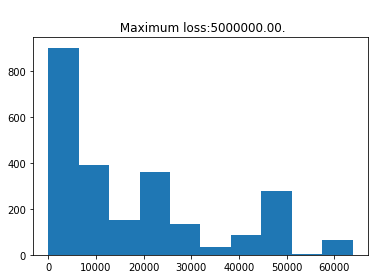

In [162]:
max_dollor_loss = np.max(dollor_loss)
std_dollor_loss =np.std(dollor_loss)
hist_low = 0
hist_high = int( np.mean(dollor_loss))
bins = range(hist_low,hist_high, (hist_high - hist_low)//10)
print('Estimated Dollar Loss in Range: %.2f'%hist_high)
plt.title('\n Maximum loss:%.2f.'%max_dollor_loss)
plt.hist(fire_df[ 'Estimated_Dollar_Loss'], bins=bins)
plt.show()

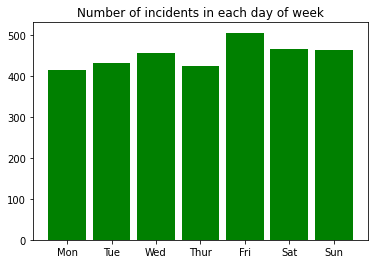

In [163]:
plt.hist(fire_df['Day_of_Week'], bins=np.arange(-.5,7.,1.0),  rwidth=0.85, color='g')
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat','Sun'))
plt.title('Number of incidents in each day of week')
plt.show()

In [164]:
fire_df['Part_of_Day'].value_counts()

Evening          749
Noon             692
Morning          503
Late Night       475
Night            423
Early Morning    317
Name: Part_of_Day, dtype: int64

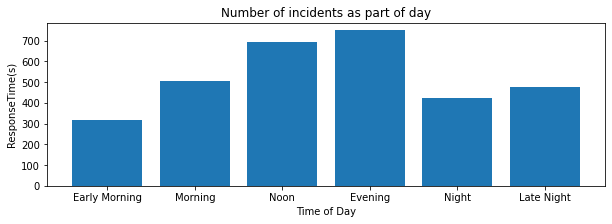

In [165]:
fig, ax = plt.subplots(figsize=(10, 3))
D = {'Early Morning': 317,'Morning': 503,'Noon': 692,'Evening': 749,'Night':423,'Late Night':475}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title('Number of incidents as part of day')
plt.xlabel('Time of Day')
plt.ylabel('ResponseTime(s)')

plt.show()

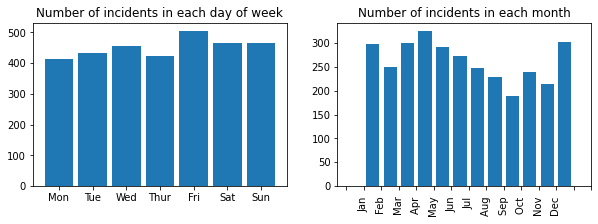

In [166]:
fig, ax = plt.subplots(figsize=(10, 3))

plt.subplot(1,2,1)
plt.hist(fire_df['Day_of_Week'], bins=np.arange(-.5,7.,1.0),  rwidth=0.85)
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat','Sun'))
plt.title('Number of incidents in each day of week')
plt.subplot(1,2,2)
plt.hist(fire_df['Month'],  bins=np.arange(0, 14, 1), rwidth=0.75)
plt.xticks(np.arange(15), ('','Jan ', 'Feb ', 'Mar ', 'Apr ', 'May ', 'Jun ','Jul ','Aug ','Sep ','Oct ','Nov ','Dec '), rotation=90)
plt.title('Number of incidents in each month')

plt.show()

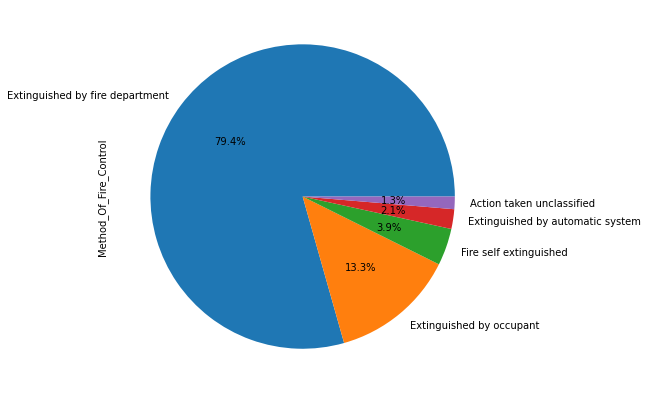

In [167]:
fire_df['Method_Of_Fire_Control'].value_counts(normalize=True).plot.pie(figsize=(7,7), autopct='%1.1f%%')

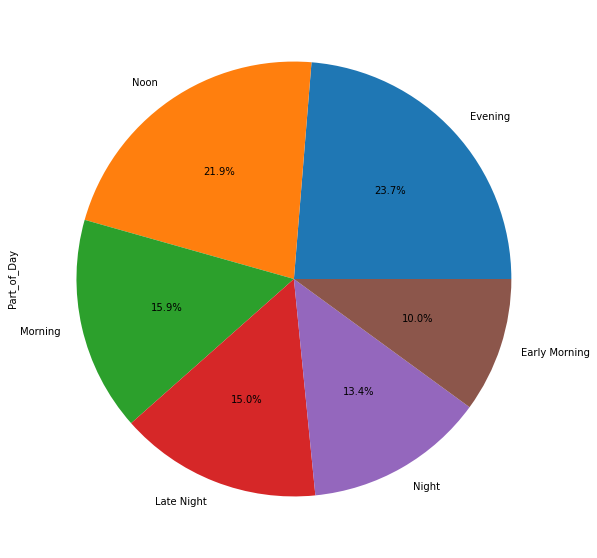

In [168]:
fire_df['Part_of_Day'].value_counts(normalize=True).plot.pie(figsize=(10,10), autopct='%1.1f%%')

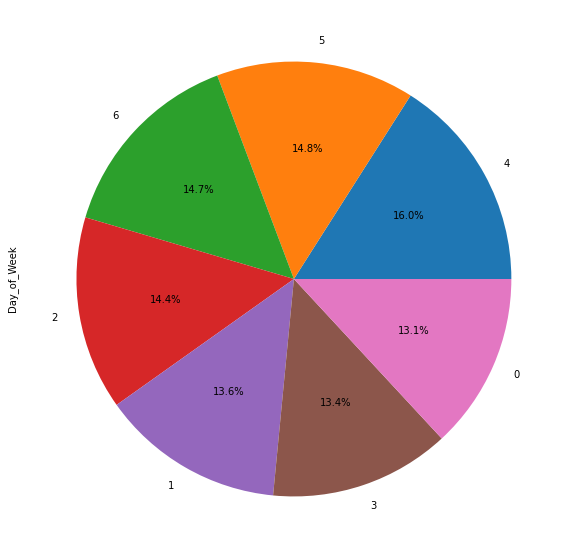

In [169]:
#l = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fire_df['Day_of_Week'].value_counts(normalize=True).plot.pie( figsize=(10,10), autopct='%1.1f%%')

In [170]:
fire_df['Day_of_Week'].value_counts(normalize=True)

4    0.159861
5    0.147515
6    0.146882
2    0.144033
1    0.136436
3    0.134220
0    0.131054
Name: Day_of_Week, dtype: float64

In [197]:
fire_df.loc[:,['Civilian_Casualties','Count_of_Persons_Rescued',	'Estimated_Dollar_Loss',	'Estimated_Number_Of_Persons_Displaced',	
               'Reaction_time_minutes'	,'Extinguish_time_minutes',	'Time_spent_minutes']].describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Reaction_time_minutes,Extinguish_time_minutes,Time_spent_minutes
count,3159.000000,3159.000000,3.159000e+03,3159.000000,3159.000000,3159.000000,3159.000000
mean,0.238683,0.143083,6.386289e+04,10.739791,5.029753,18.057309,183.989680
std,0.702396,0.898476,1.617352e+05,39.695716,1.344535,28.469191,279.411186
min,0.000000,0.000000,1.000000e+00,1.000000,0.400000,0.000000,0.400000
25%,0.000000,0.000000,5.000000e+03,2.000000,4.130000,5.020000,56.725000
50%,0.000000,0.000000,2.000000e+04,3.000000,4.930000,9.900000,88.420000
75%,0.000000,0.000000,6.000000e+04,5.000000,5.850000,18.800000,155.560000
max,15.000000,28.000000,5.000000e+06,800.000000,17.920000,360.820000,3825.550000


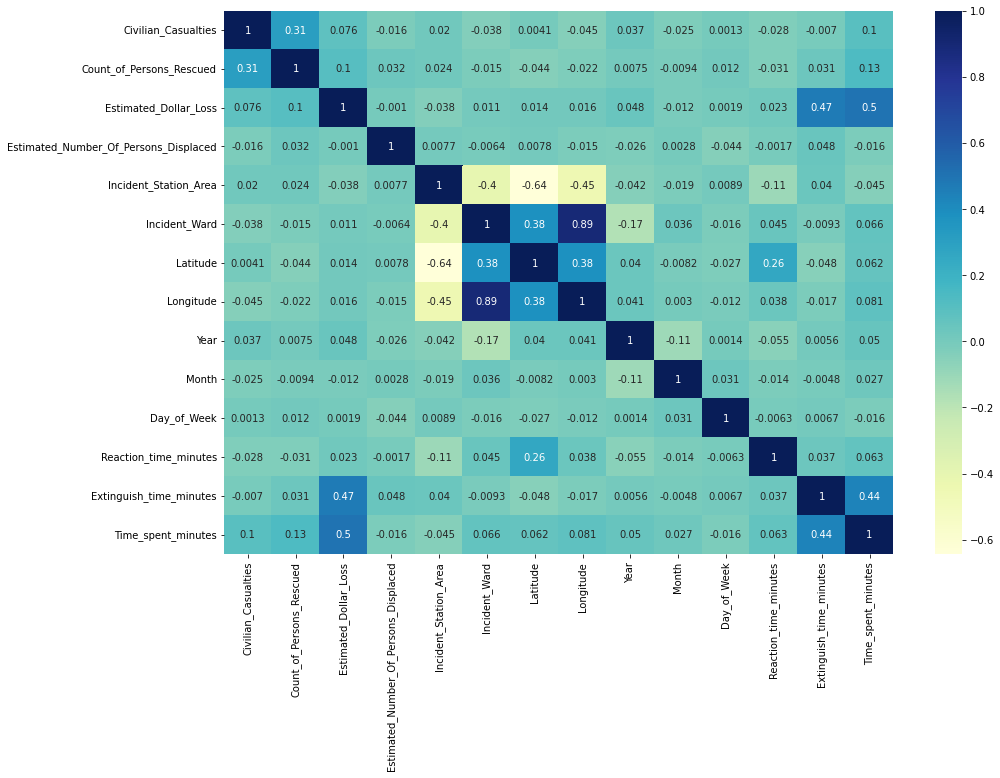

In [175]:
#df = fire_df['Count of persons rescued', 'Estimated Dollar Loss', 'Estimated Number of Persons Displaced', 'Reaction_time_minutes', 'Extinguish_time_minutes', 'Time_spent_minutes']
fig, ax = plt.subplots(figsize=(15,10))     
sns.heatmap(fire_df.corr(), cmap="YlGnBu", annot=True, ax=ax)
plt.show()

In [176]:
df = fire_df.iloc[: ,[2, 3, 4, 5, 27, 28, 29, 31, 32, 33]]

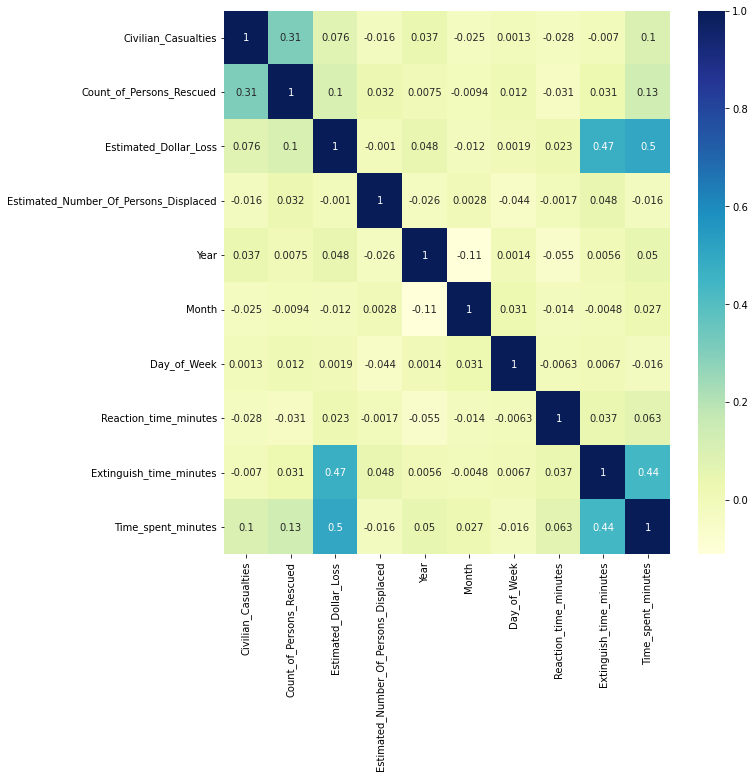

In [177]:
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)
plt.show()

In [178]:
fire_df.iloc[:, [27, 28, 29]]

,Year,Month,Day_of_Week
1,2018,11,5
2,2017,2,3
3,2012,10,1
4,2018,7,6
6,2015,3,5
...,...,...,...
11158,2014,4,3
11166,2013,6,5
11195,2017,10,1
11199,2011,10,0


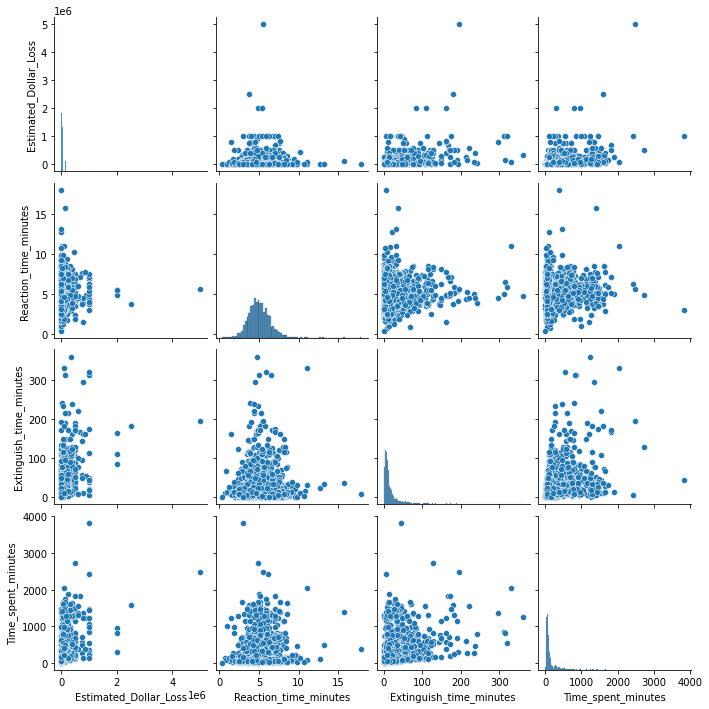

In [180]:
df2 = fire_df.iloc[:, [4,31,32,33]]
sns.pairplot(df2)
plt.show()

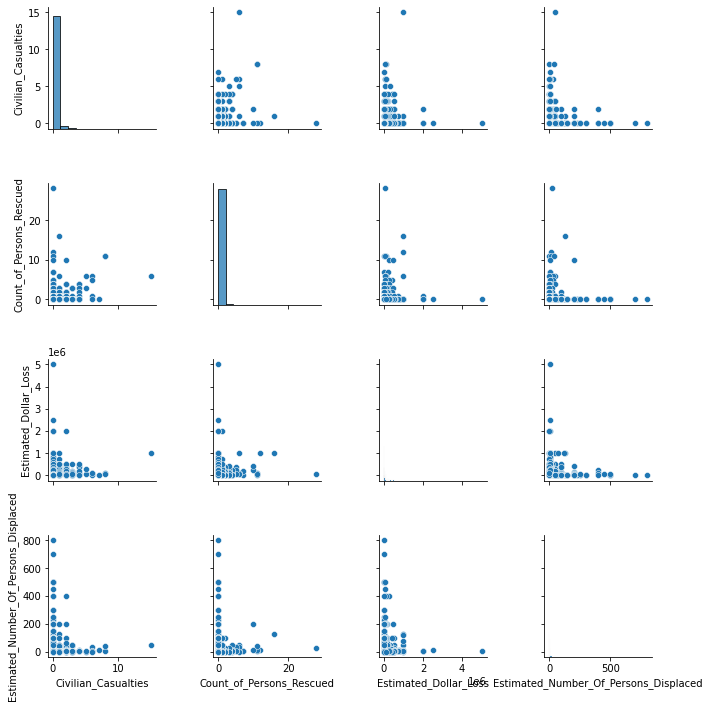

In [181]:
df2 = fire_df.iloc[:, [2,3,4,5]]
sns.pairplot(df2)
plt.show()

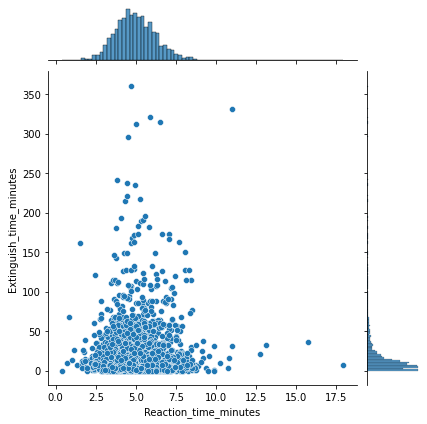

In [182]:
sns.jointplot(x='Reaction_time_minutes', y='Extinguish_time_minutes', data=fire_df)
plt.show()

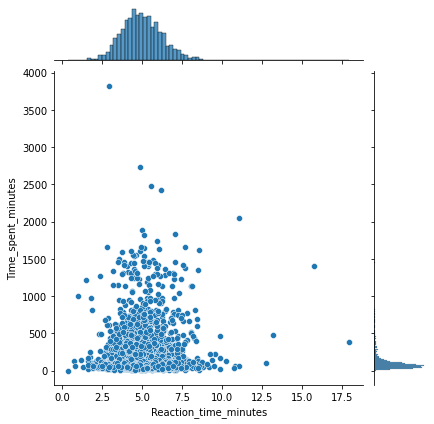

In [183]:
sns.jointplot(x='Reaction_time_minutes', y='Time_spent_minutes', data=fire_df)
plt.show()

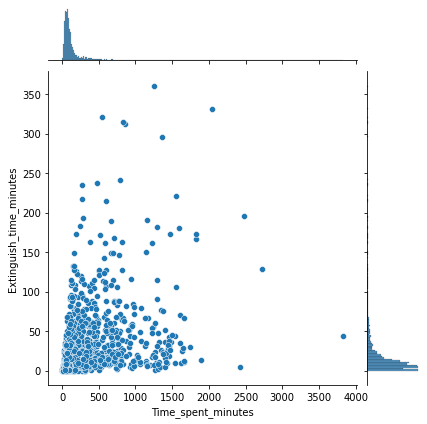

In [184]:
sns.jointplot(x='Time_spent_minutes', y='Extinguish_time_minutes', data=fire_df)
plt.show()

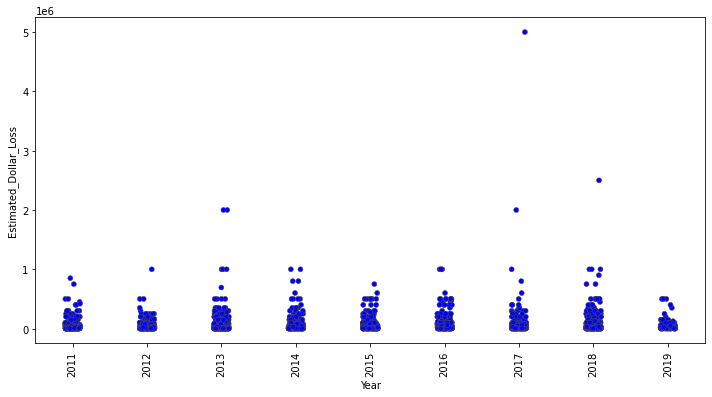

In [185]:
plt.figure(
    figsize=(12, 6))
sns.stripplot(
    x='Year', 
    y='Estimated_Dollar_Loss', 
    data=fire_df, 
    linewidth=.5, 
    color='blue')
plt.xticks(rotation=90);

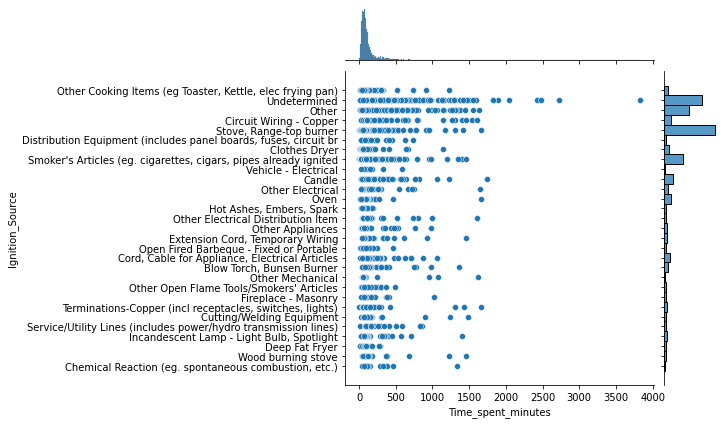

In [186]:
sns.jointplot(x='Time_spent_minutes', y='Ignition_Source', data=fire_df)
plt.show()

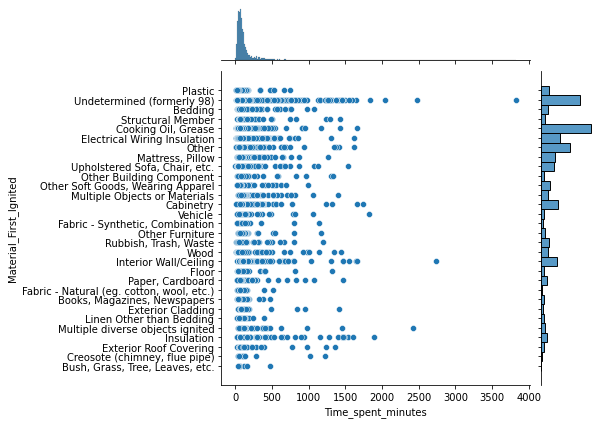

In [187]:
sns.jointplot(x='Time_spent_minutes', y='Material_First_Ignited', data=fire_df)
plt.show()

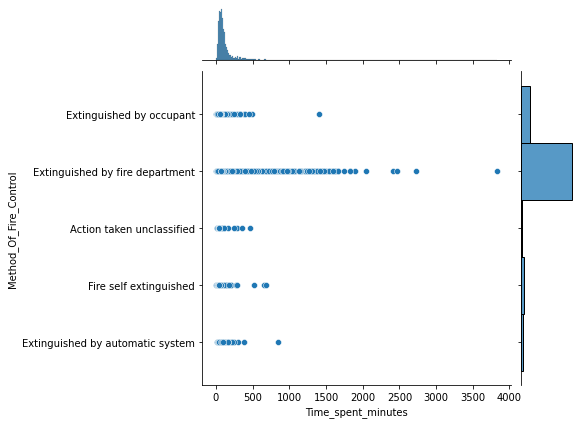

In [188]:
sns.jointplot(x='Time_spent_minutes', y='Method_Of_Fire_Control', data=fire_df)
plt.show()

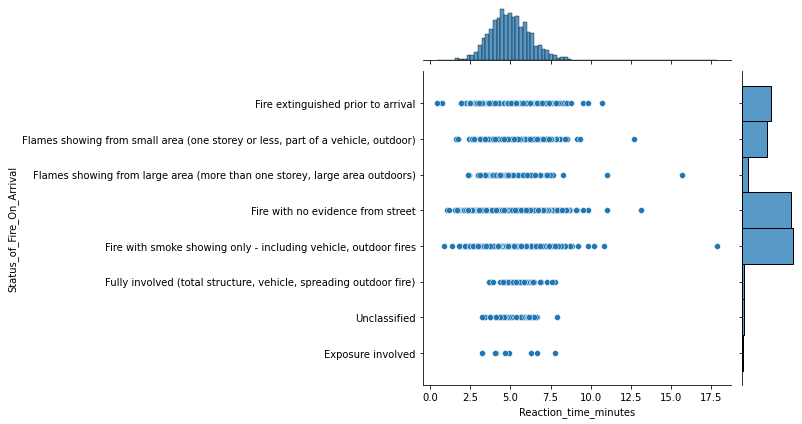

In [189]:
sns.jointplot(x='Reaction_time_minutes', y='Status_of_Fire_On_Arrival', data=fire_df)
plt.show()

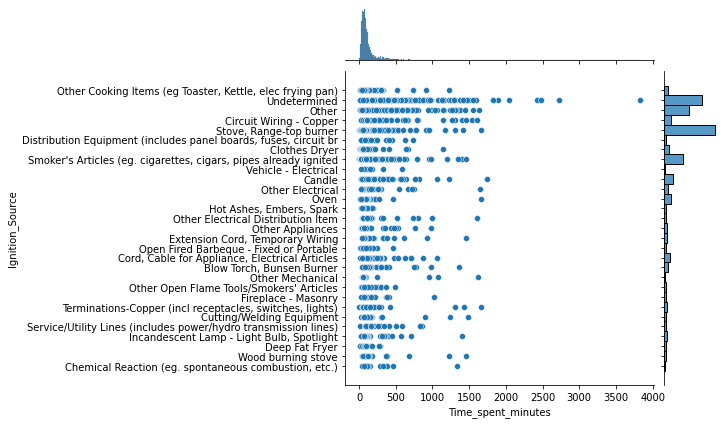

In [190]:
sns.jointplot(x='Time_spent_minutes', y='Ignition_Source', data=fire_df)
plt.show()